# Title

## intro

intro

### 3.1 setting up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def force(r1,r2,m1,m2):
    """
    Calculates the force vector between two bodies due to gravitational force.

    The function takes four arguments:
    r1: numpy array
    The position vector of the first body.
    r2: numpy array
    The position vector of the second body.
    m1: float
    The mass of the first body.
    m2: float
    The mass of the second body.

    Returns:
    f_on_m1: numpy array
    The force vector acting on the first body.

    The force is calculated using Newton's law of gravitation:
    f = G * m1 * m2 / ||r2 - r1||^3 * (r2 - r1)
    where G is the gravitational constant and ||.|| denotes the magnitude of a vector.
    """
    r12=r2-r1
    f_on_m1 = G*m1*m2/(np.linalg.norm(r12))**3 *r12
    return f_on_m1

### 3.2 A first test: two bodies, different masses

Intro and information

In [4]:
#define variables

#dimensions
Ndim = 2
#number of steps
Nsteps = 10000
#stepsize
dt = 0.001
#create array for time
time=np.arange(0,Nsteps*dt,dt)
#Gravitational constant
G = 1        
#1st mass
m1_32 = 0.0001
#2nd mass
m2_32 = 1.0
#create arrays to store values for distances, velosities and energy
r1_32 = np.zeros((Nsteps  ,Ndim  ))
r2_32 = np.zeros((Nsteps  ,Ndim  ))
v1_32 = np.zeros((Nsteps  ,Ndim  ))
v2_32 = np.zeros((Nsteps  ,Ndim  ))
E_32  = np.zeros((Nsteps))
# define initial conditions
r1_32[0 ,: ] = np.array((0 ,1 ))
v1_32[0 ,: ] = np.array((1 ,0 ))
#E[0]    = 1/2*m1*np.linalg.norm(v1[0])**2-G*m1*m2/np.linalg.norm(r2[0]-r1[0])

In [5]:
#calculate with euler method all positions and velocitues
for i in range(Nsteps-1):
    #define the force acting on mass 1
    f1 = force(r1_32[i],r2_32[i],m1_32,m2_32)
    #update velocities
    v1_32[i+1] = v1_32[i]+f1/m1_32*dt
    #update positions
    r1_32[i+1] = r1_32[i]+v1_32[i]*dt
    #update energies
    #E[i+1]    = 1/2*m1*np.linalg.norm(v1[i+1])**2-G*m1*m2/np.linalg.norm(r2[i+1]-r1[i+1])

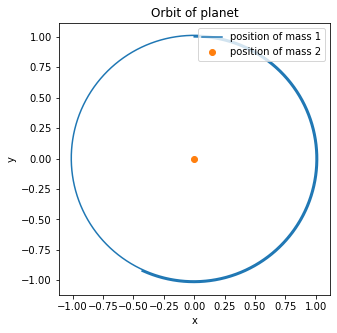

In [6]:
#create the figure
fig = plt.figure(figsize=(5,5))
#create plot
plt.plot(r1_32[:,0],r1_32[:,1],label="position of mass 1")
plt.plot(0,0,"o",label="position of mass 2")
#scalling axis
plt.axis('scaled')
#naming axis
plt.xlabel("x")
plt.ylabel("y")
#naming plot
plt.title("Orbit of planet")
#adding legend
plt.legend(loc="upper right")

### 3.3 Two bodies, similar masses

intro and information

In [7]:
#Setting parameters

#number of steps
Nsteps = 10000
#stepsize
dt = 0.001
#1st mass
m1_33 = 5
#2nd mass
m2_33 = 1.0

time=np.arange(0,Nsteps*dt,dt)

#storange arrays for positions, velocites, energies and center of mass
r1_33 = np.zeros((Nsteps  ,Ndim  ))
r2_33 = np.zeros((Nsteps  ,Ndim  ))
v1_33 = np.zeros((Nsteps  ,Ndim  ))
v2_33 = np.zeros((Nsteps  ,Ndim  ))
E1_33  = np.zeros((Nsteps))
E2_33  = np.zeros((Nsteps))
Epot_33  = np.zeros((Nsteps))
cm_33  = np.zeros((Nsteps, Ndim))

# define initial conditions
r1_33[0 ,: ] = np.array((1 ,0 ))*(-m2_33/(m1_33+m2_33))
v1_33[0 ,: ] = np.array((0 ,1 ))*(-m2_33/np.sqrt(m1_33+m2_33))

r2_33[0 ,: ] = np.array((1 ,0 ))*(1-m2_33/(m1_33+m2_33))
v2_33[0 ,: ] = np.array((0 ,1 ))*m1_33/np.sqrt(m1_33+m2_33)

E1_33[0]= 1/2*m1_33*np.linalg.norm(v1_33[0])**2
E2_33[0]= 1/2*m2_33*np.linalg.norm(v2_33[0])**2
Epot_33[0]=-G*m1_33*m2_33/np.linalg.norm(r2_33[0]-r1_33[0])

In [8]:
%%time
for i in range(Nsteps-1):
    # define forces on the timestep
    f1 = force(r1_33[i],r2_33[i],m1_33,m2_33)
    f2 = force(r2_33[i],r1_33[i],m2_33,m1_33)
    
    #define position on the next timestep
    r1_33[i+1] = r1_33[i]+v1_33[i]*dt+f1/(2*m1_33)*dt**2
    r2_33[i+1] = r2_33[i]+v2_33[i]*dt+f2/(2*m2_33)*dt**2
    
    # define forces on the next timestep
    f1new = force(r1_33[i+1],r2_33[i+1],m1_33,m2_33)
    f2new = -force(r1_33[i+1],r2_33[i+1],m1_33,m2_33)
    
    #define velocities on the next timestep
    v1_33[i+1] = v1_33[i]+dt*(f1+f1new)/(2*m1_33)
    v2_33[i+1] = v2_33[i]+dt*(f2+f2new)/(2*m2_33)
    
    #calcutale the center of mass at the timestep
    cm_33[i] = (m1_33*r1_33[i]+m2_33*r2_33[i])/(m1_33+m2_33)
    
    #define energies on the next timestep
    E1_33[i+1]= 1/2*m1_33*np.linalg.norm(v1_33[i+1])**2
    E2_33[i+1]= 1/2*m2_33*np.linalg.norm(v2_33[i+1])**2
    Epot_33[i+1]=-G*m1_33*m2_33/np.linalg.norm(r2_33[i+1]-r1_33[i+1])

CPU times: total: 594 ms
Wall time: 631 ms


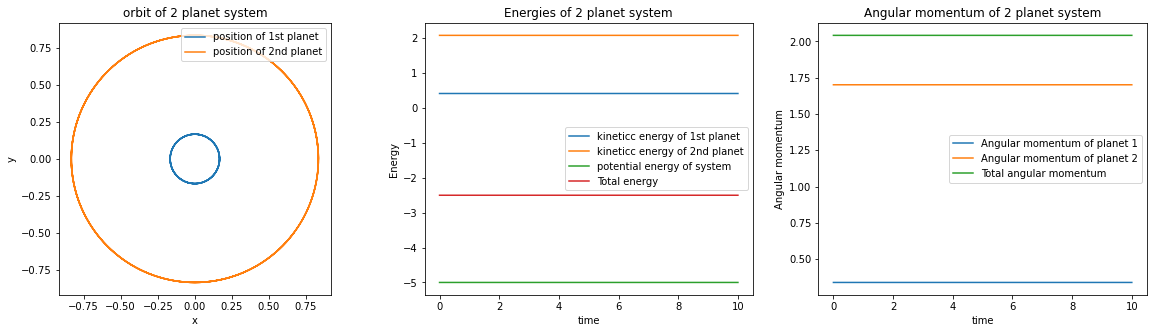

In [9]:
#makes the subplots
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))

#1st plot
#plotting
ax1.plot(r1_33[:,0],r1_33[:,1],label="position of 1st planet")
ax1.plot(r2_33[:,0],r2_33[:,1],label="position of 2nd planet")
#scalling axis
#ax1.axis('scaled')
#naming axis
ax1.set_xlabel("x")
ax1.set_ylabel("y")
#naming plot
ax1.set_title("orbit of 2 planet system")
#adding legend
ax1.legend(loc="upper right")
ax1.axis('scaled')

#2nd plot
#plotting
ax2.plot(time,E1_33,label="kineticc energy of 1st planet")
ax2.plot(time,E2_33,label="kineticc energy of 2nd planet")
ax2.plot(time,Epot_33,label="potential energy of system")
ax2.plot(time,E1_33+E2_33+Epot_33,label="Total energy")
#naming axis
ax2.set_xlabel("time")
ax2.set_ylabel("Energy")
#naming plot
ax2.set_title("Energies of 2 planet system")
#adding legend
ax2.legend()

#defining angular momentum
L1_33=(r1_33[:,0]*v1_33[:,1]-r1_33[:,1]*v1_33[:,0])*m1_33
L2_33=(r2_33[:,0]*v2_33[:,1]-r2_33[:,1]*v2_33[:,0])*m2_33

#3rd plot
#plotiing
ax3.plot(time,L1_33,label="Angular momentum of planet 1")
ax3.plot(time,L2_33,label="Angular momentum of planet 2")
ax3.plot(time,L1_33+L2_33,label="Total angular momentum")
#naming axis
ax3.set_xlabel("time")
ax3.set_ylabel("Angular momentum")
#naming plot
ax3.set_title("Angular momentum of 2 planet system")
#adding legend
ax3.legend()

### 3.4 Three bodies

intro and info

In [10]:
#Setting parameters
#1st mass
m1_34 = 1
#2nd mass
m2_34 = 3*10**(-6)

m3_34 = 3.6*10**(-8)

#stepsize
dt = 10**(-5)
#number of steps
Nsteps = 2*int((0.005000000000*np.pi*(400*m2_34 + 401*m3_34)/(np.sqrt((m1_34 + m2_34 + m3_34)*G)*(m2_34 + m3_34)))/(dt))


time=np.arange(0,Nsteps*dt,dt)

#storange arrays for positions, velocites, energies and center of mass
r1_34 = np.zeros((Nsteps  ,Ndim  ))
r2_34 = np.zeros((Nsteps  ,Ndim  ))
r3_34 = np.zeros((Nsteps  ,Ndim  ))
v1_34 = np.zeros((Nsteps  ,Ndim  ))
v2_34 = np.zeros((Nsteps  ,Ndim  ))
v3_34 = np.zeros((Nsteps  ,Ndim  ))

E1_34  = np.zeros((Nsteps))
E2_34  = np.zeros((Nsteps))
Epot_34  = np.zeros((Nsteps))

# define initial conditions
r1_34[0 ,: ] = np.array((1 ,0 ))*(0.0025*(400*m2_34 + 401*m3_34)/(m1_34 + m2_34 + m3_34))
v1_34[0 ,: ] = -np.array((0 ,1 ))*(np.sqrt((m1_34 + m2_34 + m3_34)*G)*(m2_34 + m3_34)/(m1_34 + m2_34 + m3_34))

r2_34[0 ,: ] = -np.array((1 ,0 ))+r1_34[0 ,: ]
v2_34[0 ,: ] = np.array((0 ,1 ))*(np.sqrt((m1_34 + m2_34 + m3_34)*G)*m1_34/(m1_34 + m2_34 + m3_34)+
                               np.sqrt((m1_34 + m2_34 + m3_34)*G*m3_34*(400*m1_34 - m3_34))/(m1_34 + m2_34 + m3_34))

r3_34[0 ,: ] = -(1.0025)*np.array((1 ,0 ))+r1_34[0 ,: ]
v3_34[0 ,: ] = np.array((0 ,1 ))*(np.sqrt((m1_34 + m2_34 + m3_34)*G)*m1_34/(m1_34 + m2_34 + m3_34)-
                               np.sqrt((m1_34 + m2_34 + m3_34)*G*m2_34*(401*m1_34 + m2_34))/(m1_34 + m2_34 + m3_34))

cm=np.zeros((Nsteps,2))

In [11]:
%%time
for i in range(Nsteps-1):
    # define forces on the timestep
    f1 = force(r1_34[i],r2_34[i],m1_34,m2_34)+force(r1_34[i],r3_34[i],m1_34,m3_34)
    f2 = force(r2_34[i],r1_34[i],m2_34,m1_34)+force(r2_34[i],r3_34[i],m2_34,m3_34)
    f3 = force(r3_34[i],r2_34[i],m3_34,m2_34)+force(r3_34[i],r1_34[i],m3_34,m1_34)
    
    #define position on the next timestep
    r1_34[i+1] = r1_34[i]+v1_34[i]*dt+f1/(2*m1_34)*dt**2
    r2_34[i+1] = r2_34[i]+v2_34[i]*dt+f2/(2*m2_34)*dt**2
    r3_34[i+1] = r3_34[i]+v3_34[i]*dt+f3/(2*m3_34)*dt**2
    
    #defines center of mass on this timestep
    cm[i]=(r1_34[i]*m1_34+r2_34[i]*m2_34+r3_34[i]*m3_34)/(m1_34+m2_34+m3_34)
    
    # define forces on the next timestep
    f1new = force(r1_34[i],r2_34[i],m1_34,m2_34)+force(r1_34[i],r3_34[i],m1_34,m3_34)
    f2new = force(r2_34[i],r1_34[i],m2_34,m1_34)+force(r2_34[i],r3_34[i],m2_34,m3_34)
    f3new = force(r3_34[i],r2_34[i],m3_34,m2_34)+force(r3_34[i],r1_34[i],m3_34,m1_34)
    
    #define velocities on the next timestep
    v1_34[i+1] = v1_34[i]+dt*(f1+f1new)/(2*m1_34)
    v2_34[i+1] = v2_34[i]+dt*(f2+f2new)/(2*m2_34)
    v3_34[i+1] = v3_34[i]+dt*(f3+f3new)/(2*m3_34)

CPU times: total: 2min 12s
Wall time: 2min 15s


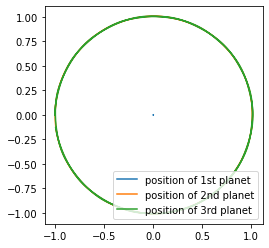

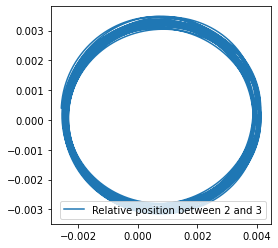

In [12]:
plt.plot(r1_34[:,0],r1_34[:,1],label="position of 1st planet")
plt.plot(r2_34[:,0],r2_34[:,1],label="position of 2nd planet")
plt.plot(r3_34[:,0],r3_34[:,1],label="position of 3rd planet")
#plt.plot(cm[:,0],cm[:,1],label="position the center of mass")
#plt.plot(r2_34[:,0]-r3_34[:,0],r2_34[:,1]-r3_34[:,1],label="position of 2nd planet")

plt.legend(loc="lower right")
plt.axis('scaled')

plt.figure()
plt.plot(r3_34[:,0]-r2_34[:,0],r3_34[:,1]-r2_34[:,1],label="Relative position between 2 and 3")
plt.axis('scaled')
plt.legend(loc="lower right")

### 3.5 A different integrator

intro and info 

In [13]:
#Setting parameters

#Dimensions
Ndim = 2
#Gravitational constant
G=1
#stepsize
dt = 10**(-5)
#number of steps
Nsteps = 2*int((0.005000000000*np.pi*(400*m2_34 + 401*m3_34)/(np.sqrt((m1_34 + m2_34 + m3_34)*G)*(m2_34 + m3_34)))/(dt))
#1st mass
m1_35 = m1_34
#2nd mass
m2_35 = m2_34
#3rd mass
m3_35 = m3_34

time=np.arange(0,Nsteps*dt,dt)

#storange arrays for positions, velocites, energies and center of mass
r1_35 = np.zeros((Nsteps  ,Ndim  ))
r2_35 = np.zeros((Nsteps  ,Ndim  ))
r3_35 = np.zeros((Nsteps  ,Ndim  ))
v1_35 = np.zeros((Nsteps  ,Ndim  ))
v2_35 = np.zeros((Nsteps  ,Ndim  ))
v3_35 = np.zeros((Nsteps  ,Ndim  ))

E1_35  = np.zeros((Nsteps))
E2_35  = np.zeros((Nsteps))
E3_35  = np.zeros((Nsteps))
EKpot  = np.zeros((Nsteps))

# define initial conditions
r1_35[0 ,: ] = r1_34[0 ,: ] 
v1_35[0 ,: ] = v1_34[0 ,: ]

r2_35[0 ,: ] = r2_34[0 ,: ]
v2_35[0 ,: ] = v2_34[0 ,: ]

r3_35[0 ,: ] = r3_34[0 ,: ]
v3_35[0 ,: ] = v3_34[0 ,: ]

cm=np.zeros((Nsteps,2))

In [14]:
# Runge-Kutta 4th order method

# loop over time steps
for i in range(Nsteps-1):

    # calculate the forces on each body
    f1 = force(r1_35[i], r2_35[i], m1_35, m2_35) + force(r1_35[i], r3_35[i], m1_35, m3_35)
    f2 = force(r2_35[i], r1_35[i], m2_35, m1_35) + force(r2_35[i], r3_35[i], m2_35, m3_35)
    f3 = force(r3_35[i], r1_35[i], m3_35, m1_35) + force(r3_35[i], r2_35[i], m3_35, m2_35)

    # calculate k1
    k1r1_35 = v1_35[i]
    k1v1_35 = f1 / m1_35
    k1r2_35 = v2_35[i]
    k1v2_35 = f2 / m2_35
    k1r3_35 = v3_35[i]
    k1v3_35 = f3 / m3_35

    # calculate k2
    k2r1_35 = v1_35[i] + 0.5 * dt * k1v1_35
    k2v1_35 = (force(r1_35[i] + 0.5 * dt * k1r1_35, r2_35[i] + 0.5 * dt * k1r2_35, m1_35, m2_35) 
             + force(r1_35[i] + 0.5 * dt * k1r1_35, r3_35[i] + 0.5 * dt * k1r3_35, m1_35, m3_35)) / m1_35
    k2r2_35 = v2_35[i] + 0.5 * dt * k1v2_35
    k2v2_35 = (force(r2_35[i] + 0.5 * dt * k1r2_35, r1_35[i] + 0.5 * dt * k1r1_35, m2_35, m1_35) 
             + force(r2_35[i] + 0.5 * dt * k1r2_35, r3_35[i] + 0.5 * dt * k1r3_35, m2_35, m3_35)) / m2_35
    k2r3_35 = v3_35[i] + 0.5 * dt * k1v3_35
    k2v3_35 = (force(r3_35[i] + 0.5 * dt * k1r3_35, r1_35[i] + 0.5 * dt * k1r1_35, m3_35, m1_35) 
             + force(r3_35[i] + 0.5 * dt * k1r3_35, r2_35[i] + 0.5 * dt * k1r2_35, m3_35, m2_35)) / m3_35

    # calculate k3
    k3r1_35 = v1_35[i] + 0.5 * dt * k2v1_35
    k3v1_35 = (force(r1_35[i], r2_35[i], m1_35, m2_35) + force(r1_35[i], r3_35[i], m1_35, m3_35)) / m1_35
    k3r2_35 = v2_35[i] + 0.5 * dt * k2v2_35
    k3v2_35 = (force(r2_35[i], r1_35[i], m2_35, m1_35) + force(r2_35[i], r3_35[i], m2_35, m3_35)) / m2_35
    k3r3_35 = v3_35[i] + 0.5 * dt * k2v3_35
    k3v3_35 = (force(r3_35[i], r1_35[i], m3_35, m1_35) + force(r3_35[i], r2_35[i], m3_35, m2_35)) / m3_35

    # calculate k4
    k4r1_35 = v1_35[i] + dt * k3v1_35
    k4v1_35 = (force(r1_35[i], r2_35[i], m1_35, m2_35) + force(r1_35[i], r3_35[i], m1_35, m3_35)) / m1_35
    k4r2_35 = v2_35[i] + dt * k3v2_35
    k4v2_35 = (force(r2_35[i], r1_35[i], m2_35, m1_35) + force(r2_35[i], r3_35[i], m2_35, m3_35)) / m2_35
    k4r3_35 = v3_35[i] + dt * k3v3_35
    k4v3_35 = (force(r3_35[i], r1_35[i], m3_35, m1_35) + force(r3_35[i], r2_35[i], m3_35, m2_35)) / m3_35

    # calculate new positions and velocities
    r1_35[i+1] = r1_35[i] + dt * (k1r1_35 + 2*k2r1_35 + 2*k3r1_35 + k4r1_35)/6
    v1_35[i+1] = v1_35[i] + dt * (k1v1_35 + 2*k2v1_35 + 2*k3v1_35 + k4v1_35)/6
    
    r2_35[i+1] = r2_35[i] + dt * (k1r2_35 + 2*k2r2_35 + 2*k3r2_35 + k4r2_35)/6
    v2_35[i+1] = v2_35[i] + dt * (k1v2_35 + 2*k2v2_35 + 2*k3v2_35 + k4v2_35)/6
    
    r3_35[i+1] = r3_35[i] + dt * (k1r3_35 + 2*k2r3_35 + 2*k3r3_35 + k4r3_35)/6
    v3_35[i+1] = v3_35[i] + dt * (k1v3_35 + 2*k2v3_35 + 2*k3v3_35 + k4v3_35)/6




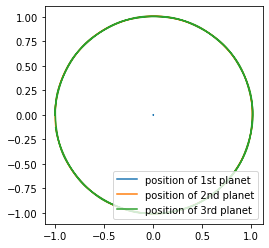

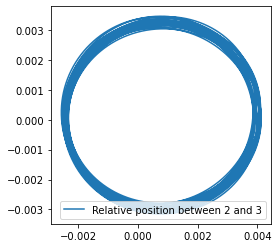

In [15]:
plt.plot(r1_35[:,0],r1_35[:,1],label="position of 1st planet")
plt.plot(r2_35[:,0],r2_35[:,1],label="position of 2nd planet")
plt.plot(r3_35[:,0],r3_35[:,1],label="position of 3rd planet")
#plt.plot(cm[:,0],cm[:,1],label="position the center of mass")
#plt.plot(r2_34[:,0]-r3_34[:,0],r2_34[:,1]-r3_34[:,1],label="position of 2nd planet")

plt.legend(loc="lower right")
plt.axis('scaled')

plt.figure()
plt.plot(r3_35[:,0]-r2_35[:,0],r3_35[:,1]-r2_35[:,1],label="Relative position between 2 and 3")
plt.axis('scaled')
plt.legend(loc="lower right")

## 5 transorbital path

intro and info

### 5.1 finding seed initial conditions

#### 5.1.1 making the earth-sun-mars system

In [16]:
#Setting parameters
#stepsize
dt = 10**(-5)
#number of steps
Nsteps = 1200000
#1st mass
m1_51 = 1
#2nd mass
m2_51 = 3*10**(-6)

m3_51 = 3.227*10**(-7)

rmars=1.52366214
vmars=np.sqrt(rmars*G*m1_51)/rmars
LEorbit=2.39214608*10**(-4)
HMorbit=9.4821*10**(-6)
theta=np.pi/2-np.pi/8

time=np.arange(0,Nsteps*dt,dt)

#storange arrays for positions, velocites, energies and center of mass
r1_51 = np.zeros((Nsteps  ,Ndim  ))
r2_51 = np.zeros((Nsteps  ,Ndim  ))
r3_51 = np.zeros((Nsteps  ,Ndim  ))
v1_51 = np.zeros((Nsteps  ,Ndim  ))
v2_51 = np.zeros((Nsteps  ,Ndim  ))
v3_51 = np.zeros((Nsteps  ,Ndim  ))
r4_51 = np.zeros((Nsteps  ,Ndim  ))
v4_51 = np.zeros((Nsteps  ,Ndim  ))

E1_51  = np.zeros((Nsteps))
E2_51  = np.zeros((Nsteps))
EPpot  = np.zeros((Nsteps))


r2_51[0 ,: ] = np.array((1 ,0 ))
v2_51[0 ,: ] = np.array((0 ,1 ))*np.sqrt(G*m1_51)

r3_51[0 ,: ] = np.array((1 ,0 ))*rmars
v3_51[0 ,: ] = np.array((0 ,1 ))*vmars

In [17]:
for i in range(Nsteps-1):
    # define forces on the timestep
    f2 = force(r2_51[i],r1_51[i],m2_51,m1_51)+force(r2_51[i],r3_51[i],m2_51,m3_51)
    f3 = force(r3_51[i],r2_51[i],m3_51,m2_51)+force(r3_51[i],r1_51[i],m3_51,m1_51)
    
    #define position on the next timestep
    r2_51[i+1] = r2_51[i]+v2_51[i]*dt+f2/(2*m2_51)*dt**2
    r3_51[i+1] = r3_51[i]+v3_51[i]*dt+f3/(2*m3_51)*dt**2
      
    # define forces on the next timestep
    f2new = force(r2_51[i],r1_51[i],m2_51,m1_51)+force(r2_51[i],r3_51[i],m2_51,m3_51)
    f3new = force(r3_51[i],r2_51[i],m3_51,m2_51)+force(r3_51[i],r1_51[i],m3_51,m1_51)
    
    #define velocities on the next timestep
    v2_51[i+1] = v2_51[i]+dt*(f2+f2new)/(2*m2_51)
    v3_51[i+1] = v3_51[i]+dt*(f3+f3new)/(2*m3_51)

(-1.6760870790756197,
 1.676098185099764,
 -1.6761311765055045,
 1.6760292122562608)

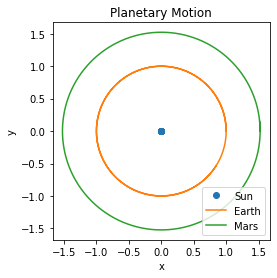

In [18]:
# plot positions of the planets and center of mass
#plt.figure(figsize=(8, 6))
plt.plot(r1_51[:, 0], r1_51[:, 1],"o", label='Sun')
plt.plot(r2_51[:, 0], r2_51[:, 1], label='Earth')
plt.plot(r3_51[:, 0], r3_51[:, 1], label='Mars')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Planetary Motion')
plt.legend(loc="lower right")
plt.axis('scaled')

#### 5.1.2 Finding the seed value for initial angle

In [21]:
j=0
theta_a=0
theta_b=np.pi/2


v_probe=np.sqrt(LEorbit*rmars*HMorbit*(2*G*HMorbit*LEorbit*m1_51*rmars + HMorbit*LEorbit*rmars*vmars**2 - 2*G*HMorbit*LEorbit*m1_51 + 2*G*HMorbit*m2_51*rmars - 2*G*LEorbit*m3_51*rmars))/(LEorbit*rmars*HMorbit)
    
#loop that optimised angle
while j < 20:
    theta=(theta_a+theta_b)/2
    
    #initial values
    r4_51[0 ,: ] = np.array((np.cos(theta) ,np.sin(theta)))*LEorbit+np.array((1 ,0 ))
    v4_51[0 ,: ] = np.array((np.cos(theta) ,np.sin(theta)))*v_probe



    k=0
    tol=HMorbit/rmars
    while k <1200000 and np.linalg.norm(r4_51[k])<(1+tol)*rmars and np.linalg.norm(r4_51[k])-np.linalg.norm(r4_51[k-1])>0:
        # define forces on the timestep
        f2 = force(r2_51[k],r1_51[k],m2_51,m1_51)
        f4 = force(r4_51[k],r2_51[k],1,m2_51)+force(r4_51[k],r1_51[k],1,m1_51)
    
        #define position on the next timestep
        r2_51[k+1] = r2_51[k]+v2_51[k]*dt+f2/(2*m2_51)*dt**2
        r4_51[k+1] = r4_51[k]+v4_51[k]*dt+f4/(2)    *dt**2
      
        # define forces on the next timestep
        f2new = force(r2_51[k],r1_51[k],m2_51,m1_51)
        f4new = force(r4_51[k],r2_51[k],1,m2_51)+force(r4_51[k],r1_51[k],1,m1_51)
    
        #define velocities on the next timestep
        v2_51[k+1] = v2_51[k]+dt*(f2+f2new)/(2*m2_51)
        v4_51[k+1] = v4_51[k]+dt*(f4+f4new)/(2)
        k+=1
    if np.linalg.norm(r4_51[k])>=(1+tol)*rmars:
        theta_a=theta
    if np.linalg.norm(r4_51[k])-np.linalg.norm(r4_51[k-1])<=0:
        theta_b=theta
    j+=1
thetatrue=theta

(-1.676020443273118, 1.67602797729872, -1.6760262821416791, 1.6760262821416791)

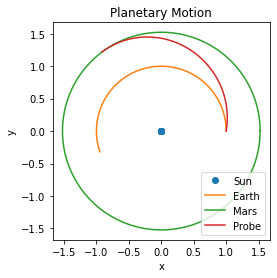

In [22]:
# plot positions of the planets and center of mass
#plt.figure(figsize=(8, 6))
plt.plot(r1_51[:, 0], r1_51[:, 1],"o", label='Sun')
plt.plot(r2_51[:k, 0], r2_51[:k, 1], label='Earth')
#plt.plot(r3_51[:, 0], r3_51[:, 1], label='Mars')
plt.plot(np.cos(np.linspace(0,2*np.pi,1000))*rmars, np.sin(np.linspace(0,2*np.pi,1000))*rmars, label='Mars')
plt.plot(r4_51[:k, 0], r4_51[:k, 1], label='Probe')
#plt.plot(cm[:, 0], cm[:, 1], label='Center of Mass')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Crude optimisation')
plt.legend(loc="lower right")
plt.axis('scaled')

### 5.2 Optimising Timing

if the distance between marss and the probe has a minimum outside the HMorbit within a tollerance, and if it comes too close within a tolerance, then we know the timing is off.

In [209]:
#Setting parameters
#stepsize
dt = 10**(-5)
#number of steps
Nsteps = int(2*k*5.7/10)
#1st mass
m1_52 = 1
#2nd mass
m2_52 = 3*10**(-6)

m3_52 = 3.227*10**(-7)

rmars=1.52366214
vmars=np.sqrt(rmars*G*m1_52)/rmars
LEorbit=2.39214608*10**(-4)
HMorbit=9.4821*10**(-6)

r1_52 = np.zeros((Nsteps  ,Ndim  ))
r2_52 = np.zeros((Nsteps  ,Ndim  ))
r3_52 = np.zeros((Nsteps  ,Ndim  ))
v1_52 = np.zeros((Nsteps  ,Ndim  ))
v2_52 = np.zeros((Nsteps  ,Ndim  ))
v3_52 = np.zeros((Nsteps  ,Ndim  ))
r4_52 = np.zeros((Nsteps  ,Ndim  ))
v4_52 = np.zeros((Nsteps  ,Ndim  ))
diffOT= np.zeros(Nsteps)

r2_52[0 ,: ] = np.array((1 ,0 ))
v2_52[0 ,: ] = np.array((0 ,1 ))*np.sqrt(G*m1_51)

r4_52[0 ,: ] = np.array((np.cos(thetatrue) ,np.sin(thetatrue)))*LEorbit+np.array((1 ,0 ))
v4_52[0 ,: ] = np.array((np.cos(thetatrue) ,np.sin(thetatrue)))*v_probe

time=np.arange(0,Nsteps*dt,dt)

on run 0
the error is 2.686912414445511e-05
succes


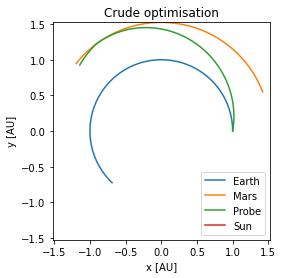

on run 1
the error is 2.206451775915292e-05
succes


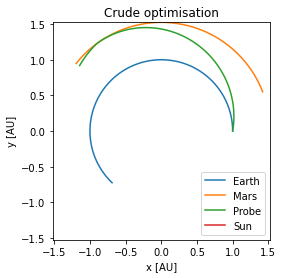

on run 2
the error is 1.6615903840101144e-05
succes


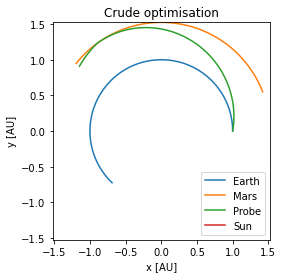

on run 3
the error is 1.3370077741769628e-05
succes


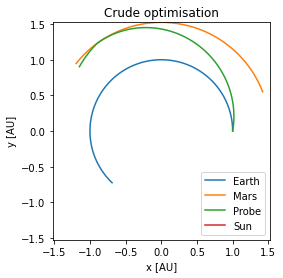

on run 4
the error is 1.1782608027635163e-05
succes


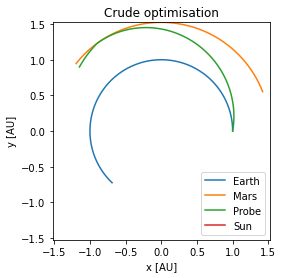

on run 5
the error is 1.1148787711517212e-05
succes


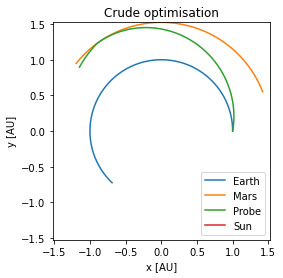

on run 6
the error is 1.0889998338000732e-05
succes


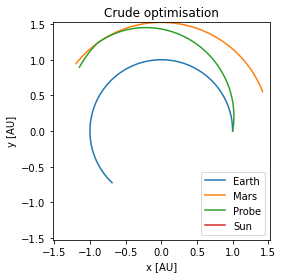

on run 7
the error is 1.0860551409202464e-05
succes


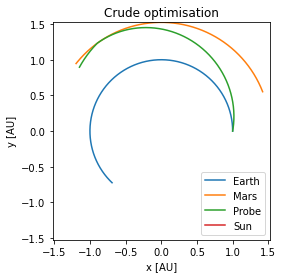

on run 8
the error is 1.086594112259628e-05


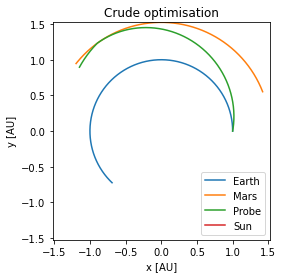

on run 8
the error is 1.0862851138242604e-05


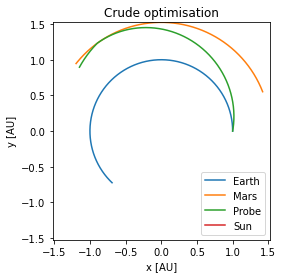

on run 8
the error is 1.0861230074095094e-05


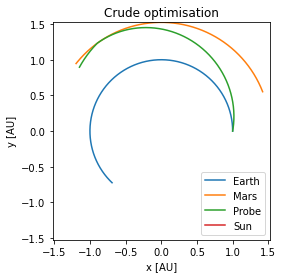

on run 8
the error is 1.086068019348097e-05


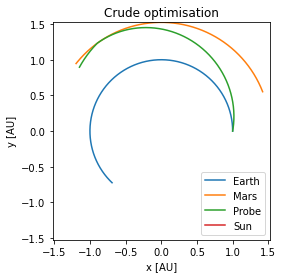

on run 8
the error is 1.0860565421456581e-05


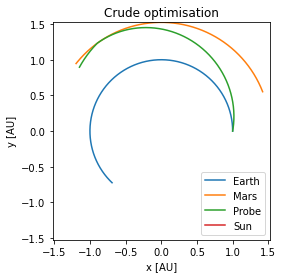

on run 8
the error is 1.0860552172404804e-05


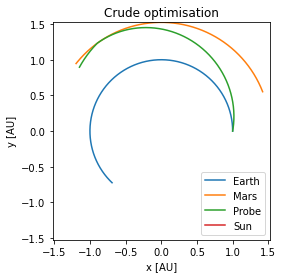

on run 8
the error is 1.0860551445587055e-05


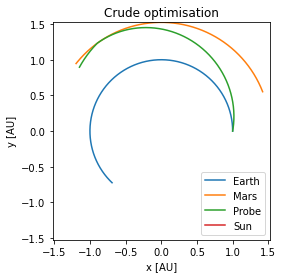

on run 8
the error is 1.0860551406873174e-05
succes


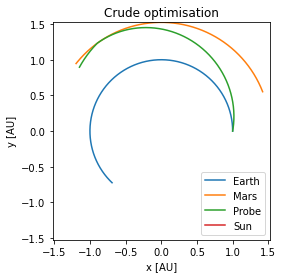

on run 9
the error is 1.0865941121426043e-05


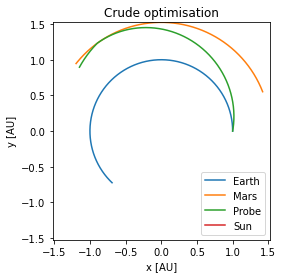

on run 9
the error is 1.0862851140245322e-05


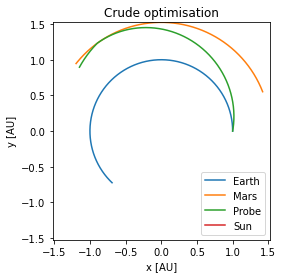

on run 9
the error is 1.0861230073840296e-05


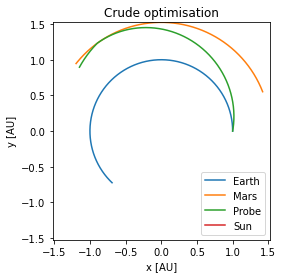

on run 9
the error is 1.0860680194161078e-05


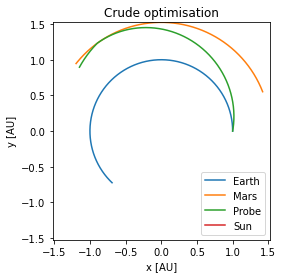

on run 9
the error is 1.0860565422273971e-05


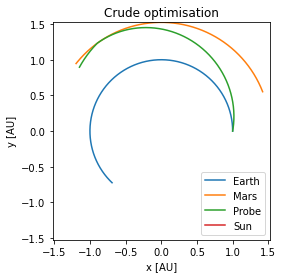

on run 9
the error is 1.0860552175005106e-05


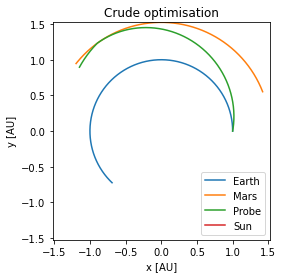

on run 9
the error is 1.08605514425686e-05


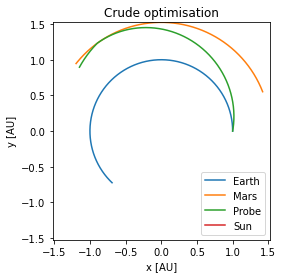

on run 9
the error is 1.0860551407965438e-05


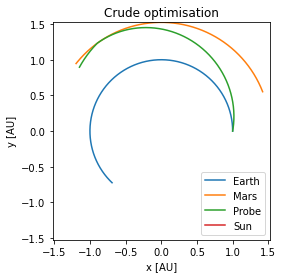

on run 9
the error is 1.0860551406873174e-05
succes


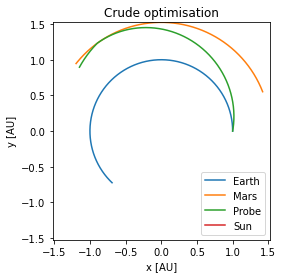

on run 10
the error is 1.0865941121426043e-05


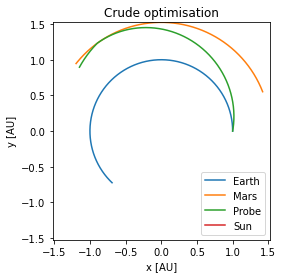

on run 10
the error is 1.08628511392656e-05


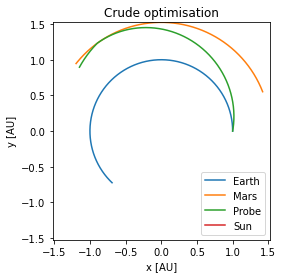

on run 10
the error is 1.0861230073840296e-05


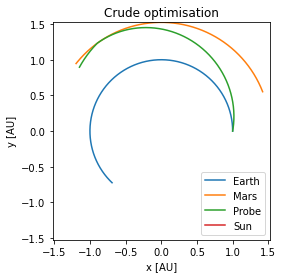

on run 10
the error is 1.0860680194161078e-05


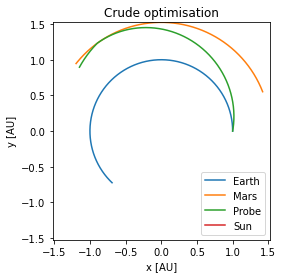

on run 10
the error is 1.0860565422975882e-05


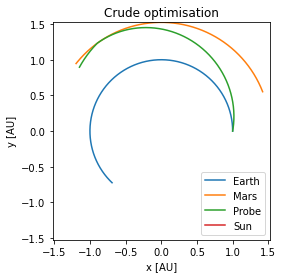

on run 10
the error is 1.0860552174519712e-05


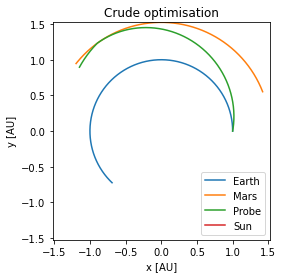

on run 10
the error is 1.0860551442563375e-05


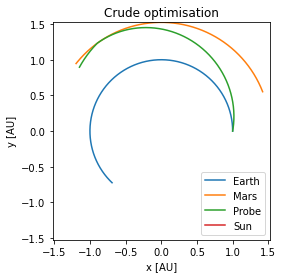

on run 10
the error is 1.086055140863606e-05


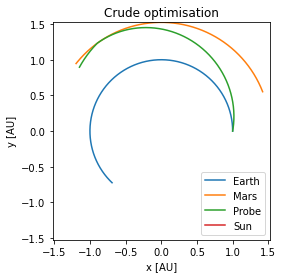

on run 10
the error is 1.0860551407549018e-05


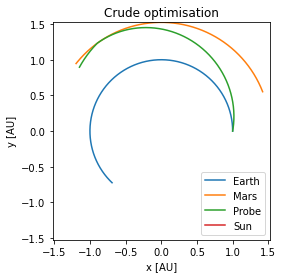

on run 10
the error is 1.0860551406873174e-05
succes


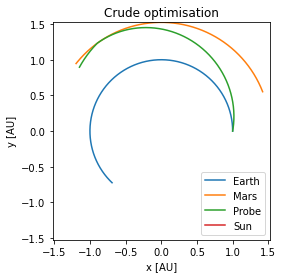

on run 11
the error is 1.0865941121426043e-05


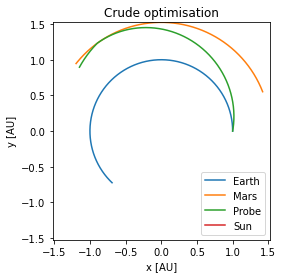

on run 11
the error is 1.08628511392656e-05


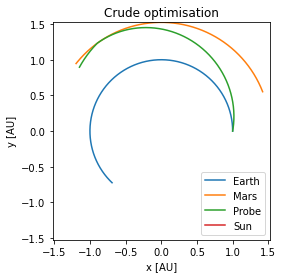

on run 11
the error is 1.0861230073840296e-05


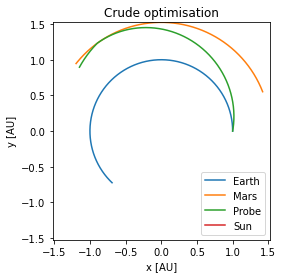

on run 11
the error is 1.0860680194161078e-05


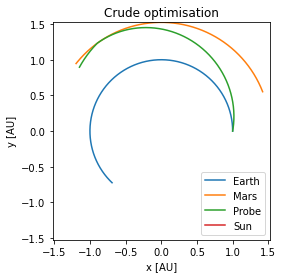

on run 11


KeyboardInterrupt: 

In [211]:
j=0
marsstart=np.arctan(r4_51[k][1]/r4_51[k][0])+np.pi-(k*dt)/(2*np.pi/(vmars/rmars))*2*np.pi
h=15
phi=np.zeros(h+1)
phi[0]=marsstart
Q=0
O=0
error=np.ones(h)
tol=HMorbit/2

while j < h and error[j-1]>HMorbit:
    print("on run", j)
    r3_52[0 ,: ] = np.array((np.cos(phi[j]) ,np.sin(phi[j])))*rmars
    v3_52[0 ,: ] = np.array((-np.sin(phi[j]) ,np.cos(phi[j])))*vmars
    
    å=0
    l=0
    while l <Nsteps-1:
         # define forces on the timestep
        
        diffOT[l]=np.linalg.norm(r3_52[l]-r4_52[l])
        
        f2 = force(r2_52[l],r1_52[l],m2_52,m1_52) + force(r2_52[l],r3_52[l],m2_52,m3_52)
        f3 = force(r3_52[l],r1_52[l],m3_52,m1_52) + force(r3_52[l],r2_52[l],m3_52,m2_52)
        f4 = (force(r4_52[l],r2_52[l],   1,m2_52) + force(r4_52[l],r1_52[l],    1,m1_52) +
              force(r4_52[l],r3_52[l],   1,m3_52))
    
        #define position on the next timestep
        r2_52[l+1] = r2_52[l]+v2_52[l]*dt+f2/(2*m2_52)*dt**2
        r3_52[l+1] = r3_52[l]+v3_52[l]*dt+f3/(2*m3_52)*dt**2
        r4_52[l+1] = r4_52[l]+v4_52[l]*dt+f4/(2)      *dt**2
      
        # define forces on the next timestep
        f2new = force(r2_52[l],r1_52[l],m2_52,m1_52) + force(r2_52[l],r3_52[l],m2_52,m3_52)
        f3new = force(r3_52[l],r1_52[l],m3_52,m1_52) + force(r3_52[l],r2_52[l],m3_52,m2_52)
        f4new = (force(r4_52[l],r2_52[l],   1,m2_52) + force(r4_52[l],r1_52[l],    1,m1_52) +
              force(r4_52[l],r3_52[l],   1,m3_52))
    
        #define velocities on the next timestep
        v2_52[l+1] = v2_52[l]+dt*(f2+f2new)/(2*m2_52)
        v3_52[l+1] = v3_52[l]+dt*(f3+f3new)/(2*m3_52)
        v4_52[l+1] = v4_52[l]+dt*(f4+f4new)/(2)
        
        if np.linalg.norm(r4_52[l]) >= rmars and å==0:
            Q=l
            å=1
        
        l+=1

    error[j]=np.min(diffOT[:-1])
    print("the error is", error[j])
    
    phi[j+1]=phi[j]+1/2 * (np.arctan(r4_52[Q][1]/r4_52[Q][0])-np.arctan(r3_52[Q][1]/r3_52[Q][0]))
    
    if error[j]>error[j-1]:
        phi[j]=(phi[j]+2**O *phi[j-1])/(1+2**O)
        O+=1
    else:
        j+=1
        print("succes")
        O=0
    
    
    plt.plot(r2_52[:l, 0], r2_52[:l, 1], label='Earth')
    plt.plot(r3_52[:l, 0], r3_52[:l, 1], label='Mars')
    plt.plot(r4_52[:l, 0], r4_52[:l, 1], label='Probe')
    plt.plot(r1_52[:l, 0], r1_52[:l, 1], label='Sun')
    plt.xlabel('x [AU]')
    plt.ylabel('y [AU]')
    plt.title('Crude optimisation')
    plt.legend(loc="lower right")
    plt.axis('scaled')
    plt.xlim((-rmars,rmars))
    plt.ylim((-rmars,rmars))
    plt.show()

In [189]:
diffOT

array([0.69231347, 0.69230667, 0.69229988, ..., 0.        , 0.        ,
       0.        ])

In [203]:
(phi[1]+(np.arctan(r4_52[Q][1]/r4_52[Q][0])-np.arctan(r3_52[Q][1]/r3_52[Q][0])))*np.pi/180

-0.0008504460944854027

In [ ]:
print(marsstart)

In [ ]:
HMorbit

In [ ]:
r4_52[k][1]/r4_52[k][0]

In [ ]:
r4_51[k][0]

In [ ]:
r4_51[k][1]

In [ ]:
print(theta)

In [ ]:
print(l)

In [ ]:
print(2*k)

In [ ]:
np.linalg.norm(r4_51[k])-rmars

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def exp(x,a,b,c):
    return a*np.exp(b*x)+c

In [ ]:
curve_fit(exp,range(1,14) , error[:13], p0=(0.004,-0.6,0.0001))

In [ ]:
print(error[:13])

In [ ]:
0.00010963/100

### 5.3 Optimising direction

In [258]:
#Setting parameters
#stepsize
dt = 10**(-5)
#number of steps
Nsteps = int(k*1.2)
#1st mass
m1_53 = 1
#2nd mass
m2_53 = 3*10**(-6)

m3_53 = 3.227*10**(-7)

rmars=1.52366214
vmars=np.sqrt(rmars*G*m1_51)/rmars
LEorbit=2.39214608*10**(-4)
HMorbit=9.4821*10**(-6)
v_probe=np.sqrt(LEorbit*rmars*HMorbit*(2*G*HMorbit*LEorbit*m1_53*rmars + HMorbit*LEorbit*rmars*vmars**2 - 2*G*HMorbit*LEorbit*m1_53 + 2*G*HMorbit*m2_53*rmars - 2*G*LEorbit*m3_53*rmars))/(LEorbit*rmars*HMorbit)

marsstart=np.arctan(r4_51[k][1]/r4_51[k][0])+np.pi-(k*dt)/(2*np.pi/(vmars/rmars))*2*np.pi

time=np.arange(0,Nsteps*dt,dt)

#storange arrays for positions, velocites, energies and center of mass
r1_53 = np.zeros((Nsteps  ,Ndim  ))
r2_53 = np.zeros((Nsteps  ,Ndim  ))
r3_53 = np.zeros((Nsteps  ,Ndim  ))
v1_53 = np.zeros((Nsteps  ,Ndim  ))
v2_53 = np.zeros((Nsteps  ,Ndim  ))
v3_53 = np.zeros((Nsteps  ,Ndim  ))
r4_53 = np.zeros((Nsteps  ,Ndim  ))
v4_53 = np.zeros((Nsteps  ,Ndim  ))
diffOD= np.zeros(Nsteps)

E1_53  = np.zeros((Nsteps))
E2_53  = np.zeros((Nsteps))
EPpot  = np.zeros((Nsteps))


r2_53[0 ,: ] = np.array((1 ,0 ))
v2_53[0 ,: ] = np.array((0 ,1 ))*np.sqrt(G*m1_51)

r3_53[0 ,: ] = np.array((np.cos(marsstart) ,np.sin(marsstart)))*rmars
v3_53[0 ,: ] = np.array((-np.sin(marsstart) ,np.cos(marsstart)))*vmars


iterations= 0
[-3.27075199e-05  2.44212595e-05]
[-0.0003799   0.00025924]
[  41.85120759 -445.02038511]
[1.5558137e-06 5.7750262e-06]
[1.80908101e-06 1.47378726e-06]
[8.89137686e-02 2.64884615e-02 2.68691241e-05 2.32281833e-01
 3.71880616e-01]
[1.30466137 1.33899456 1.37332776 1.40766095 1.44199415]
2


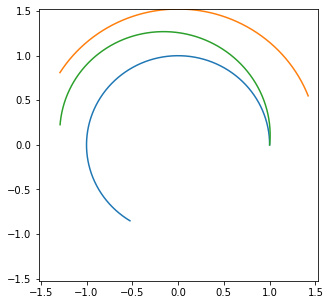

iterations= 1
[-0.0003799   0.00025924]
[ 0.19372214 -0.15465854]
[  41.85120759 -445.02038511]
[-3.04031732e-06  3.77278687e-05]
[1.5558137e-06 5.7750262e-06]
[2.64884615e-02 1.14096776e-03 2.68691241e-05 9.23348286e-02
 2.32281833e-01]
[1.33899456 1.35616116 1.37332776 1.39049436 1.40766095]
2


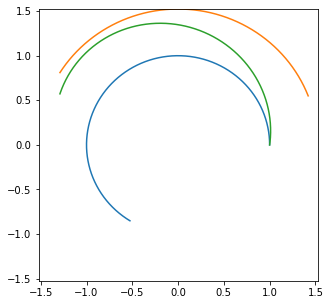

iterations= 2
[ 0.19372214 -0.15465854]
[ 0.00397941 -0.0037407 ]
[  41.85120759 -445.02038511]
[-9.42671334e-05  2.63617291e-04]
[-3.04031732e-06  3.77278687e-05]
[1.14096776e-03 7.68672558e-03 2.68691241e-05 3.39506159e-02
 9.23348286e-02]
[1.35616116 1.36474446 1.37332776 1.38191106 1.39049436]
2


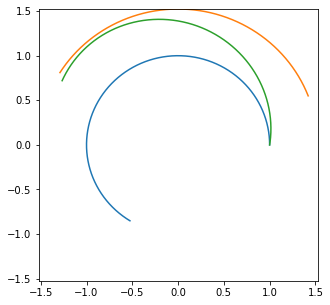

iterations= 3
[ 0.00397941 -0.0037407 ]
[ 0.00534453 -0.00584067]
[  41.85120759 -445.02038511]
[-0.00090438  0.00163881]
[-9.42671334e-05  2.63617291e-04]
[7.68672558e-03 6.38442393e-03 2.68691241e-05 1.31301898e-02
 3.39506159e-02]
[1.36474446 1.36903611 1.37332776 1.37761941 1.38191106]
2


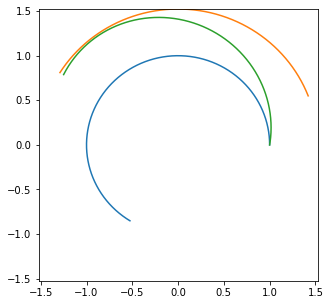

iterations= 4
[ 0.00534453 -0.00584067]
[ 0.01317766 -0.0159386 ]
[  41.85120759 -445.02038511]
[-0.0056913   0.00866239]
[-0.00090438  0.00163881]
[6.38442393e-03 3.95018349e-03 2.68691241e-05 5.57982039e-03
 1.31301898e-02]
[1.36903611 1.37118193 1.37332776 1.37547358 1.37761941]
2


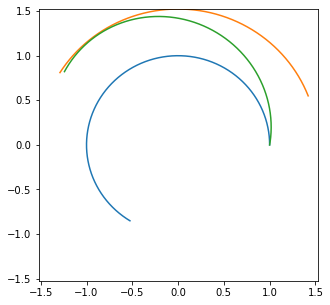

iterations= 5
[ 0.01317766 -0.0159386 ]
[ 0.0412945  -0.05339015]
[  41.85120759 -445.02038511]
[-0.02948639  0.04118457]
[-0.0056913   0.00866239]
[3.95018349e-03 2.18655125e-03 2.68691241e-05 2.52407092e-03
 5.57982039e-03]
[1.37118193 1.37225485 1.37332776 1.37440067 1.37547358]
2


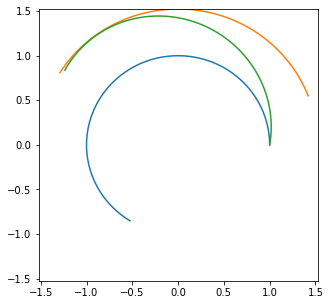

iterations= 6
[ 0.0412945  -0.05339015]
[ 0.14299657 -0.1950398 ]
[  41.85120759 -445.02038511]
[-0.14279577  0.18801241]
[-0.02948639  0.04118457]
[2.18655125e-03 1.15513245e-03 2.68691241e-05 1.16912004e-03
 2.52407092e-03]
[1.37225485 1.3727913  1.37332776 1.37386422 1.37440067]
2


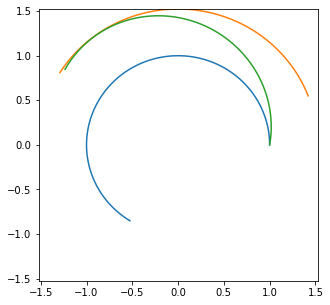

iterations= 7
[ 0.14299657 -0.1950398 ]
[ 0.50785443 -0.73636421]
[  41.85120759 -445.02038511]
[-0.71640957  0.87653582]
[-0.14279577  0.18801241]
[1.15513245e-03 6.00629765e-04 2.68691241e-05 5.33906171e-04
 1.16912004e-03]
[1.3727913  1.37305953 1.37332776 1.37359599 1.37386422]
2


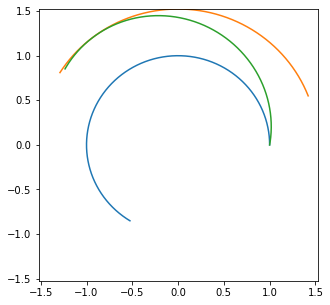

iterations= 8
[ 0.50785443 -0.73636421]
[ 1.74638162 -2.7722516 ]
[  41.85120759 -445.02038511]
[-4.23755541  4.5874886 ]
[-0.71640957  0.87653582]
[6.00629765e-04 3.13831598e-04 2.68691241e-05 2.27314932e-04
 5.33906171e-04]
[1.37305953 1.37319364 1.37332776 1.37346187 1.37359599]
2


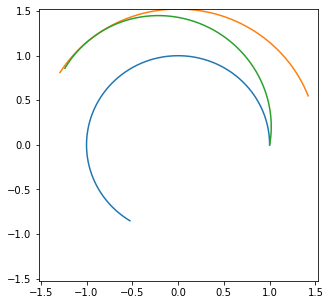

iterations= 9
[ 1.74638162 -2.7722516 ]
[ 5.43142425 -9.97591044]
[  41.85120759 -445.02038511]
[-41.33685901  32.18047071]
[-4.23755541  4.5874886 ]
[3.13831598e-04 1.68552785e-04 2.68691241e-05 7.84857568e-05
 2.27314932e-04]
[1.37319364 1.3732607  1.37332776 1.37339482 1.37346187]
2


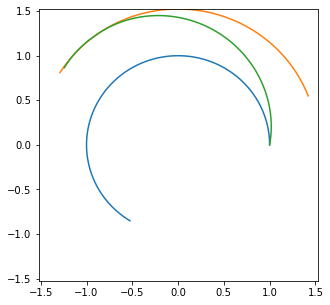

iterations= 10
[ 5.43142425 -9.97591044]
[ 14.29381186 -31.88079334]
[  41.85120759 -445.02038511]
[-2130.84814733   486.83079576]
[-41.33685901  32.18047071]
[1.68552785e-04 9.61053182e-05 2.68691241e-05 1.21506329e-05
 7.84857568e-05]
[1.3732607  1.37329423 1.37332776 1.37336129 1.37339482]
3


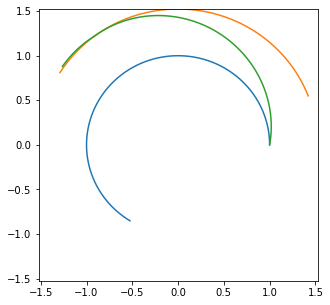

iterations= 11
[  41.85120759 -445.02038511]
[  4421.19419308 -42296.62955033]
[-2130.84814733   486.83079576]
[-149.04131117   88.9299398 ]
[-41.33685901  32.18047071]
[2.68691241e-05 2.75465201e-06 1.21506329e-05 4.31200330e-05
 7.84857568e-05]
[1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
1


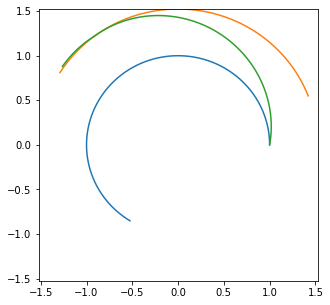

iterations= 12


KeyboardInterrupt: 

In [260]:
j=0
theta_array=np.linspace(0.95*thetatrue,1.05*thetatrue,5)
error_array=np.linspace(0,5,5)*10
p=0
r4_53[0 ,: ]=np.array((100000 ,100000))
while j < 20 and np.linalg.norm(r4_53[p]-r3_53[p])>HMorbit:
    print("iterations=", j)
    
    for æ in range(5):
        r4_53[0 ,: ] = np.array((np.cos(theta_array[æ]) ,np.sin(theta_array[æ])))*LEorbit+np.array((1 ,0 ))
        v4_53[0 ,: ] = np.array((np.cos(theta_array[æ]) ,np.sin(theta_array[æ])))*v_probe
    
        å=0
        p=0
        tol=HMorbit/rmars
        while p <Nsteps-1:
            # define forces on the timestep
            diffOD[p]=np.linalg.norm(r3_53[p]-r4_53[p])
            
            f2 = force(r2_53[p],r1_53[p],m2_53,m1_53) + force(r2_53[p],r3_53[p],m2_53,m3_53)
            f3 = force(r3_53[p],r1_53[p],m3_53,m1_53) + force(r3_53[p],r2_53[p],m3_53,m2_53)
            f4 = (force(r4_53[p],r2_53[p],   1,m2_53) + force(r4_53[p],r1_53[p],    1,m1_53) +
                  force(r4_53[p],r3_53[p],   1,m3_53))
    
            #define position on the next timestep
            r2_53[p+1] = r2_53[p]+v2_53[p]*dt+f2/(2*m2_53)*dt**2
            r3_53[p+1] = r3_53[p]+v3_53[p]*dt+f3/(2*m3_53)*dt**2
            r4_53[p+1] = r4_53[p]+v4_53[p]*dt+f4/(2)      *dt**2
      
            # define forces on the next timestep
            f2new = force(r2_53[p],r1_53[p],m2_53,m1_53) + force(r2_53[p],r3_53[p],m2_53,m3_53)
            f3new = force(r3_53[p],r1_53[p],m3_53,m1_53) + force(r3_53[p],r2_53[p],m3_53,m2_53)
            f4new = (force(r4_53[p],r2_53[p],   1,m2_53) + force(r4_53[p],r1_53[p],    1,m1_53) +
                     force(r4_53[p],r3_53[p],   1,m3_53))
    
            #define vepocities on the next timestep
            v2_53[p+1] = v2_53[p]+dt*(f2+f2new)/(2*m2_53)
            v3_53[p+1] = v3_53[p]+dt*(f3+f3new)/(2*m3_53)
            v4_53[p+1] = v4_53[p]+dt*(f4+f4new)/(2)

            p+=1
        
        print(force(r4_53[np.argmin(diffOD[:-1])],r3_53[np.argmin(diffOD[:-1])],   1,m3_53))
        error_array[æ]=np.min(diffOD[:-1])
    
    lowest_index=np.argmin(error_array)
    print(error_array)
    print(theta_array)
    print(np.argmin(error_array))
    
    if lowest_index<4 and lowest_index>0:
        theta_array=np.linspace(theta_array[lowest_index-1],theta_array[lowest_index+1],5)
    elif lowest_index==0:
        theta_array=np.linspace(theta_array[0],theta_array[1],5)
    elif lowest_index==4:
        theta_array=np.linspace(theta_array[3],theta_array[4],5)
    
    plt.figure(figsize=(5,5))
    plt.plot(r2_53[:p, 0], r2_53[:p, 1], label='Earth')
    plt.plot(r3_53[:p, 0], r3_53[:p, 1], label='Mars')
    plt.plot(r4_53[:p, 0], r4_53[:p, 1], label='Probe')
    plt.xlim((-rmars,rmars))
    plt.ylim((-rmars,rmars))
    plt.show()
    j+=1

In [ ]:
theta_array

In [ ]:
plt.plot(r2_53[:p, 0], r2_53[:p, 1], label='Earth')
#plt.plot(r3_53[:2, 0], r3_53[:2, 1], label='Mars')
plt.plot(r4_53[:p, 0], r4_53[:p, 1], label='Probe')
plt.legend()

In [ ]:
force(,r1_53[1],m3_53,m1_53)

In [ ]:
r1_53[1]

In [ ]:
k

In [ ]:
np.linspace(1,2,5)

In [ ]:
error_array

In [ ]:
lowest_index,lowest_index2

In [ ]:
range(5)[5]

In [ ]:
np.array([1,6,3,7,5])

In [ ]:
np.argpartition(np.array([1,6,3,7,5]),4)[:2]

In [ ]:
thetatrue

[  410.25868498 -1734.7900368 ]
[  489.85772674 -1894.98577049]
[  501.88671262 -1954.596638  ]
[  423.05976324 -2056.36165758]
[  349.29370765 -1272.80316051]
[1.34544995e-05 1.28402471e-05 1.26455732e-05 1.23979211e-05
 1.56363480e-05]
[1.35523271 1.35523277 1.35523284 1.35523291 1.35523297]
3


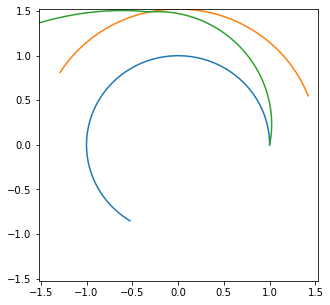

[  501.88671262 -1954.596638  ]
[  470.72218707 -1989.69560035]
[  423.05976324 -2056.36165758]
[  360.86399459 -1185.56864118]
[  349.29370765 -1272.80316051]
[1.26455732e-05 1.25629971e-05 1.23979211e-05 1.61367515e-05
 1.56363480e-05]
[1.35523284 1.35523287 1.35523291 1.35523294 1.35523297]
2


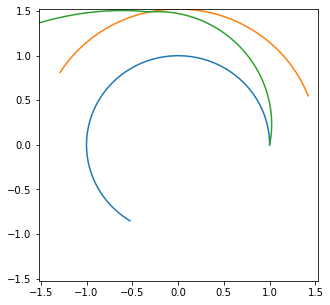

[  470.72218707 -1989.69560035]
[  448.39845141 -2018.04119301]
[  423.05976324 -2056.36165758]
[  370.66425579 -1153.25713747]
[  360.86399459 -1185.56864118]
[1.25629971e-05 1.24940215e-05 1.23979211e-05 1.63216025e-05
 1.61367515e-05]
[1.35523287 1.35523289 1.35523291 1.35523292 1.35523294]
2


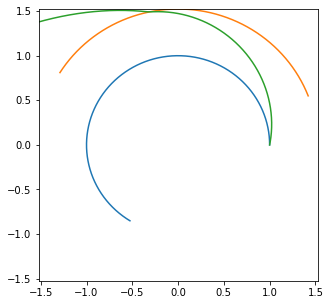

[  448.39845141 -2018.04119301]
[  436.03683997 -2035.8456369 ]
[  423.05976324 -2056.36165758]
[  409.60229347 -2079.77800598]
[  370.66425579 -1153.25713747]
[1.24940215e-05 1.24496553e-05 1.23979211e-05 1.23384136e-05
 1.63216025e-05]
[1.35523289 1.3552329  1.35523291 1.35523291 1.35523292]
3


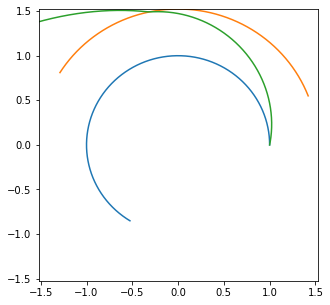

[  423.05976324 -2056.36165758]
[  416.38279563 -2067.6962524 ]
[  409.60229347 -2079.77800598]
[  402.73401532 -2092.62866772]
[  370.66425579 -1153.25713747]
[1.23979211e-05 1.23691589e-05 1.23384136e-05 1.23056536e-05
 1.63216025e-05]
[1.35523291 1.35523291 1.35523291 1.35523292 1.35523292]
3


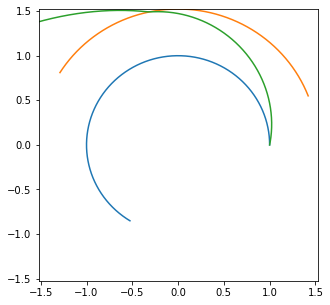

[  409.60229347 -2079.77800598]
[  406.17791654 -2086.10643023]
[  402.73401532 -2092.62866772]
[  372.01985357 -1149.74397777]
[  370.66425579 -1153.25713747]
[1.23384136e-05 1.23222857e-05 1.23056536e-05 1.63413608e-05
 1.63216025e-05]
[1.35523291 1.35523292 1.35523292 1.35523292 1.35523292]
2


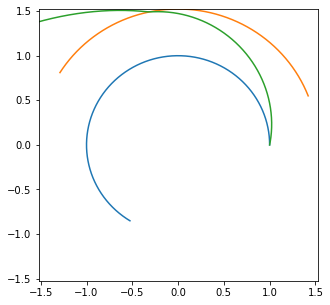

[  406.17791654 -2086.10643023]
[  404.45811657 -2089.34349465]
[  402.73401532 -2092.62866772]
[  401.004938  -2095.9641518]
[  372.01985357 -1149.74397777]
[1.23222857e-05 1.23140320e-05 1.23056536e-05 1.22971454e-05
 1.63413608e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
3


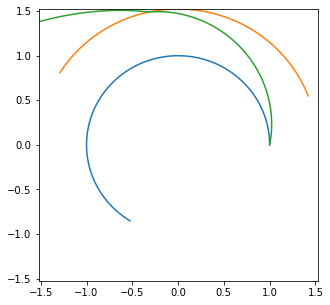

[  402.73401532 -2092.62866772]
[  401.87001888 -2094.29025379]
[  401.004938  -2095.9641518]
[  400.13906177 -2097.6499371 ]
[  372.01985357 -1149.74397777]
[1.23056536e-05 1.23014154e-05 1.22971454e-05 1.22928449e-05
 1.63413608e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
3


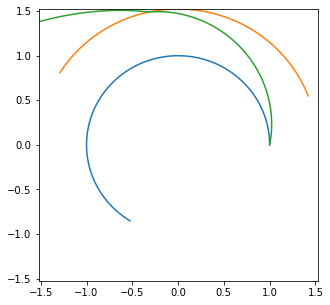

[  401.004938  -2095.9641518]
[  400.57232115 -2096.80510636]
[  400.13906177 -2097.6499371 ]
[  399.70592983 -2098.49701187]
[  372.01985357 -1149.74397777]
[1.22971454e-05 1.22950001e-05 1.22928449e-05 1.22906839e-05
 1.63413608e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
3


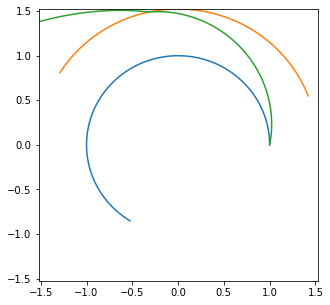

[  400.13906177 -2097.6499371 ]
[  399.9219373  -2098.07443465]
[  399.70592983 -2098.49701187]
[  372.10548327 -1149.52786976]
[  372.01985357 -1149.74397777]
[1.22928449e-05 1.22917619e-05 1.22906839e-05 1.63425729e-05
 1.63413608e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
2


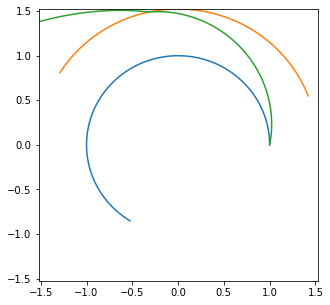

[  399.9219373  -2098.07443465]
[  399.81402737 -2098.28543157]
[  399.70592983 -2098.49701187]
[  372.14825737 -1149.42030724]
[  372.10548327 -1149.52786976]
[1.22917619e-05 1.22912237e-05 1.22906839e-05 1.63431759e-05
 1.63425729e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
2


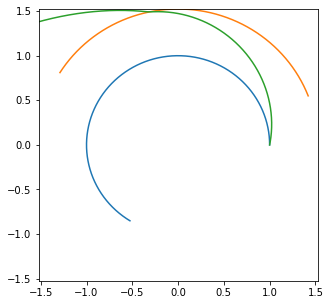

[  399.81402737 -2098.28543157]
[  399.75976022 -2098.39171373]
[  399.70592983 -2098.49701187]
[  399.6513841  -2098.60402888]
[  372.14825737 -1149.42030724]
[1.22912237e-05 1.22909525e-05 1.22906839e-05 1.22904109e-05
 1.63431759e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
3


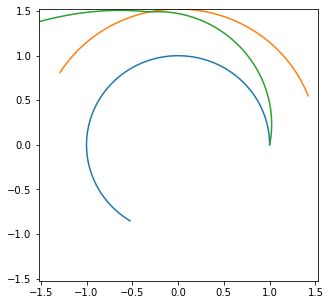

[  399.70592983 -2098.49701187]
[  399.67830768 -2098.55128153]
[  399.6513841  -2098.60402888]
[  399.62445582 -2098.65673992]
[  372.14825737 -1149.42030724]
[1.22906839e-05 1.22905454e-05 1.22904109e-05 1.22902764e-05
 1.63431759e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
3


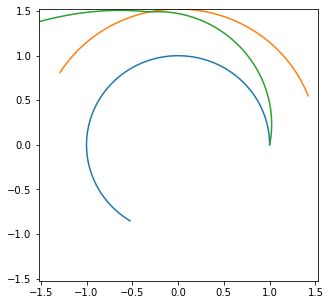

[  399.6513841  -2098.60402888]
[  399.63808381 -2098.62998924]
[  399.6244549  -2098.65674221]
[  372.15337135 -1149.40765282]
[  372.14825737 -1149.42030724]
[1.22904109e-05 1.22903447e-05 1.22902764e-05 1.63432466e-05
 1.63431759e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
2


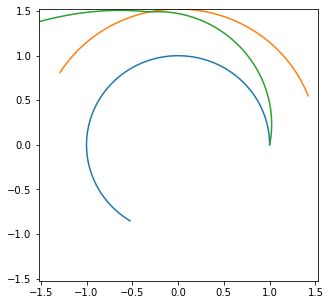

[  399.63808381 -2098.62998924]
[  399.63154283 -2098.64275207]
[  399.6244549  -2098.65674221]
[  372.15613087 -1149.40067416]
[  372.15337135 -1149.40765282]
[1.22903447e-05 1.22903121e-05 1.22902764e-05 1.63432858e-05
 1.63432466e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
2


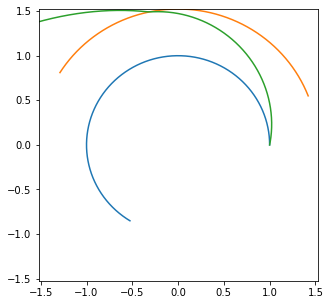

[  399.63154283 -2098.64275207]
[  399.62806338 -2098.64960551]
[  399.6244549  -2098.65674221]
[  372.15748719 -1149.39724845]
[  372.15613087 -1149.40067416]
[1.22903121e-05 1.22902946e-05 1.22902764e-05 1.63433050e-05
 1.63432858e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
2


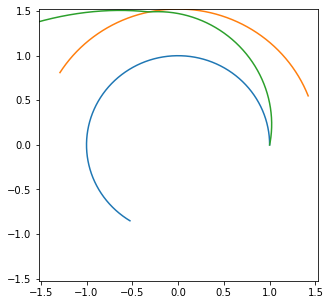

[  399.62806338 -2098.64960551]
[  399.62627782 -2098.65311962]
[  399.6244549  -2098.65674221]
[  372.15813558 -1149.39564347]
[  372.15748719 -1149.39724845]
[1.22902946e-05 1.22902857e-05 1.22902764e-05 1.63433140e-05
 1.63433050e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
2


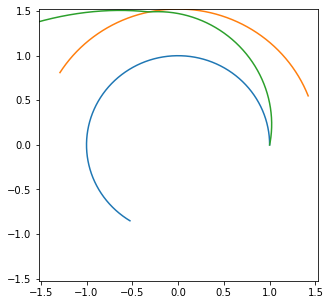

[  399.62627782 -2098.65311962]
[  399.6255101 -2098.6545977]
[  399.6244549  -2098.65674221]
[  399.62353641 -2098.65856249]
[  372.15813558 -1149.39564347]
[1.22902857e-05 1.22902819e-05 1.22902764e-05 1.22902718e-05
 1.63433140e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
3


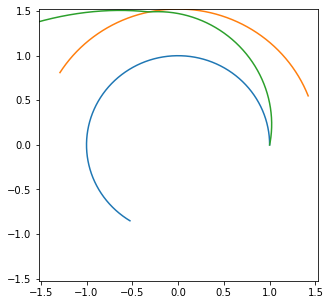

[  399.6244549  -2098.65674221]
[  399.62397321 -2098.65770059]
[  399.62353641 -2098.65856249]
[  372.15831132 -1149.39517662]
[  372.15813558 -1149.39564347]
[1.22902764e-05 1.22902740e-05 1.22902718e-05 1.63433166e-05
 1.63433140e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
2


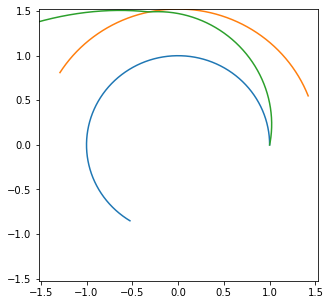

[  399.62397321 -2098.65770059]
[  399.62377113 -2098.65809587]
[  399.62353641 -2098.65856249]
[  399.62329274 -2098.65904825]
[  372.15831132 -1149.39517662]
[1.22902740e-05 1.22902730e-05 1.22902718e-05 1.22902705e-05
 1.63433166e-05]
[1.35523292 1.35523292 1.35523292 1.35523292 1.35523292]
3


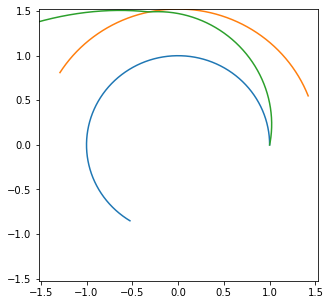

In [33]:
j=0
theta_array=np.linspace(1.35523271,1.35523297,5)
error_array=np.ones(5)*10
p=0
r4_53[0 ,: ]=np.array((100000 ,100000))
while j < 5 and np.linalg.norm(r4_53[p]-r3_53[p])>HMorbit:
    
    for æ in range(5):
        r4_53[0 ,: ] = np.array((np.cos(theta_array[æ]) ,np.sin(theta_array[æ])))*LEorbit+np.array((1 ,0 ))
        v4_53[0 ,: ] = np.array((np.cos(theta_array[æ]) ,np.sin(theta_array[æ])))*v_probe
    
        å=0
        p=0
        tol=HMorbit/rmars
        while p <int(k*1.2):
            # define forces on the timestep
            f2 = force(r2_53[p],r1_53[p],m2_53,m1_53) + force(r2_53[p],r3_53[p],m2_53,m3_53)
            f3 = force(r3_53[p],r1_53[p],m3_53,m1_53) + force(r3_53[p],r2_53[p],m3_53,m2_53)
            f4 = (force(r4_53[p],r2_53[p],   1,m2_53) + force(r4_53[p],r1_53[p],    1,m1_53) +
                  force(r4_53[p],r3_53[p],   1,m3_53))
    
            #define position on the next timestep
            r2_53[p+1] = r2_53[p]+v2_53[p]*dt+f2/(2*m2_53)*dt**2
            r3_53[p+1] = r3_53[p]+v3_53[p]*dt+f3/(2*m3_53)*dt**2
            r4_53[p+1] = r4_53[p]+v4_53[p]*dt+f4/(2)      *dt**2
      
            # define forces on the next timestep
            f2new = force(r2_53[p],r1_53[p],m2_53,m1_53) + force(r2_53[p],r3_53[p],m2_53,m3_53)
            f3new = force(r3_53[p],r1_53[p],m3_53,m1_53) + force(r3_53[p],r2_53[p],m3_53,m2_53)
            f4new = (force(r4_53[p],r2_53[p],   1,m2_53) + force(r4_53[p],r1_53[p],    1,m1_53) +
                     force(r4_53[p],r3_53[p],   1,m3_53))
    
            #define vepocities on the next timestep
            v2_53[p+1] = v2_53[p]+dt*(f2+f2new)/(2*m2_53)
            v3_53[p+1] = v3_53[p]+dt*(f3+f3new)/(2*m3_53)
            v4_53[p+1] = v4_53[p]+dt*(f4+f4new)/(2)

            if np.linalg.norm(r4_53[p])<(1+tol)*rmars and np.linalg.norm(r4_53[p])>(1-tol)*rmars and å==0:
                ø=p
                å+=1
            p+=1
        
        print(force(r4_53[ø],r3_53[ø],   1,m3_53))
        error_array[æ]=np.linalg.norm(r3_53[ø]-r4_53[ø])
    
    lowest_index=np.argmin(error_array)
    print(error_array)
    print(theta_array)
    print(np.argmin(error_array))
    
    if lowest_index<4 and lowest_index>0:
        theta_array=np.linspace(theta_array[lowest_index-1],theta_array[lowest_index+1],5)
    elif lowest_index==0:
        theta_array=np.linspace(theta_array[0],theta_array[1],5)
    elif lowest_index==4:
        theta_array=np.linspace(theta_array[3],theta_array[4],5)
    
    plt.figure(figsize=(5,5))
    plt.plot(r2_53[:p, 0], r2_53[:p, 1], label='Earth')
    plt.plot(r3_53[:p, 0], r3_53[:p, 1], label='Mars')
    plt.plot(r4_53[:p, 0], r4_53[:p, 1], label='Probe')
    plt.xlim((-rmars,rmars))
    plt.ylim((-rmars,rmars))
    plt.show()
    j+=1

In [43]:
np.array([1.30466137,1.33899456,1.37332776,1.40766095,1.44199415])/thetatrue

array([0.95 , 0.975, 1.   , 1.025, 1.05 ])

### 5.4 zig-zag optimisation

In [100]:
#Setting parameters
#stepsize
dt = 10**(-5)
#number of steps
Nsteps = int(k*1.5)
#1st mass
m1_54 = 1
#2nd mass
m2_54 = 3*10**(-6)

m3_54 = 3.227*10**(-7)

rmars=1.52366214
vmars=np.sqrt(rmars*G*m1_51)/rmars
LEorbit=2.39214608*10**(-4)
HMorbit=9.4821*10**(-6)
v_probe=np.sqrt(LEorbit*rmars*HMorbit*(2*G*HMorbit*LEorbit*m1_54*rmars + HMorbit*LEorbit*rmars*vmars**2 - 2*G*HMorbit*LEorbit*m1_54 + 2*G*HMorbit*m2_54*rmars - 2*G*LEorbit*m3_54*rmars))/(LEorbit*rmars*HMorbit)

marsstart=np.arctan(r4_51[k][1]/r4_51[k][0])+np.pi-(k*dt)/(2*np.pi/(vmars/rmars))*2*np.pi

time=np.arange(0,Nsteps*dt,dt)

#storange arrays for positions, velocites, energies and center of mass
r1_54 = np.zeros((Nsteps  ,Ndim  ))
r2_54 = np.zeros((Nsteps  ,Ndim  ))
r3_54 = np.zeros((Nsteps  ,Ndim  ))
v1_54 = np.zeros((Nsteps  ,Ndim  ))
v2_54 = np.zeros((Nsteps  ,Ndim  ))
v3_54 = np.zeros((Nsteps  ,Ndim  ))
r4_54 = np.zeros((Nsteps  ,Ndim  ))
v4_54 = np.zeros((Nsteps  ,Ndim  ))


E1_54  = np.zeros((Nsteps))
E2_54  = np.zeros((Nsteps))
EPpot  = np.zeros((Nsteps))


r2_54[0 ,: ] = np.array((1 ,0 ))
v2_54[0 ,: ] = np.array((0 ,1 ))*np.sqrt(G*m1_51)



iterations= 0
[-3.27075199e-05  2.44212595e-05]
[-0.0003799   0.00025924]
[  41.85120759 -445.02038511]
[1.5558137e-06 5.7750262e-06]
[1.80908101e-06 1.47378726e-06]
direction opimisation
error array= [8.89137686e-02 2.64884615e-02 2.68691241e-05 2.32281833e-01
 3.71880616e-01]
direction array (imput)= [1.30466137 1.33899456 1.37332776 1.40766095 1.44199415]
lowest index = 2


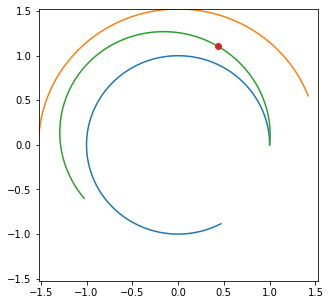

[-0.0003799   0.00025924]
[ 0.19372214 -0.15465854]
[  41.85120759 -445.02038511]
[-3.04031732e-06  3.77278687e-05]
[1.5558137e-06 5.7750262e-06]
direction opimisation
error array= [2.64884615e-02 1.14096776e-03 2.68691241e-05 9.23348286e-02
 2.32281833e-01]
direction array (imput)= [1.33899456 1.35616116 1.37332776 1.39049436 1.40766095]
lowest index = 2


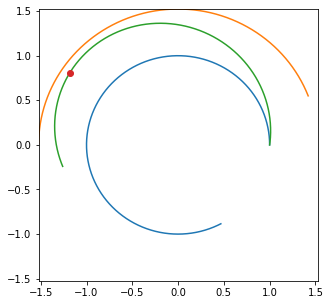

[ 0.19372214 -0.15465854]
[ 0.00397941 -0.0037407 ]
[  41.85120759 -445.02038511]
[-9.42671334e-05  2.63617291e-04]
[-3.04031732e-06  3.77278687e-05]
direction opimisation
error array= [1.14096776e-03 7.68672558e-03 2.68691241e-05 3.39506159e-02
 9.23348286e-02]
direction array (imput)= [1.35616116 1.36474446 1.37332776 1.38191106 1.39049436]
lowest index = 2


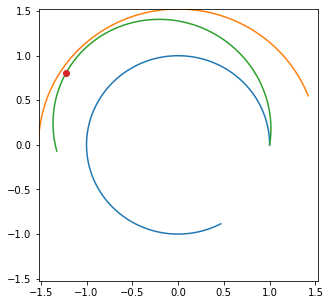

[ 0.00397941 -0.0037407 ]
[ 0.00534453 -0.00584067]
[  41.85120759 -445.02038511]
[-0.00090438  0.00163881]
[-9.42671334e-05  2.63617291e-04]
direction opimisation
error array= [7.68672558e-03 6.38442393e-03 2.68691241e-05 1.31301898e-02
 3.39506159e-02]
direction array (imput)= [1.36474446 1.36903611 1.37332776 1.37761941 1.38191106]
lowest index = 2


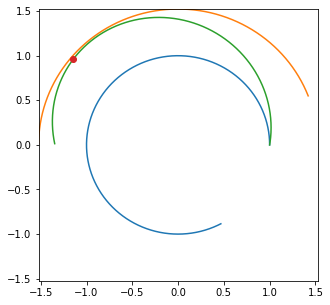

[ 0.00534453 -0.00584067]
[ 0.01317766 -0.0159386 ]
[  41.85120759 -445.02038511]
[-0.0056913   0.00866239]
[-0.00090438  0.00163881]
direction opimisation
error array= [6.38442393e-03 3.95018349e-03 2.68691241e-05 5.57982039e-03
 1.31301898e-02]
direction array (imput)= [1.36903611 1.37118193 1.37332776 1.37547358 1.37761941]
lowest index = 2


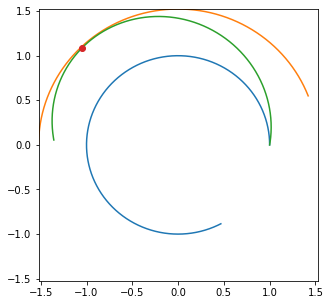

[ 0.01317766 -0.0159386 ]
[ 0.0412945  -0.05339015]
[  41.85120759 -445.02038511]
[-0.02948639  0.04118457]
[-0.0056913   0.00866239]
direction opimisation
error array= [3.95018349e-03 2.18655125e-03 2.68691241e-05 2.52407092e-03
 5.57982039e-03]
direction array (imput)= [1.37118193 1.37225485 1.37332776 1.37440067 1.37547358]
lowest index = 2


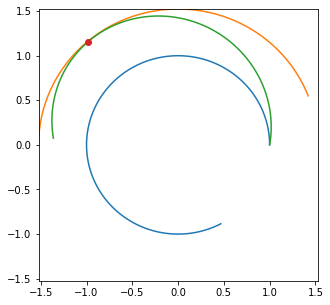

[ 0.0412945  -0.05339015]
[ 0.14299657 -0.1950398 ]
[  41.85120759 -445.02038511]
[-0.14279577  0.18801241]
[-0.02948639  0.04118457]
direction opimisation
error array= [2.18655125e-03 1.15513245e-03 2.68691241e-05 1.16912004e-03
 2.52407092e-03]
direction array (imput)= [1.37225485 1.3727913  1.37332776 1.37386422 1.37440067]
lowest index = 2


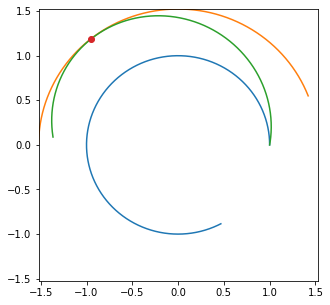

[ 0.14299657 -0.1950398 ]
[ 0.50785443 -0.73636421]
[  41.85120759 -445.02038511]
[-0.71640957  0.87653582]
[-0.14279577  0.18801241]
direction opimisation
error array= [1.15513245e-03 6.00629765e-04 2.68691241e-05 5.33906171e-04
 1.16912004e-03]
direction array (imput)= [1.3727913  1.37305953 1.37332776 1.37359599 1.37386422]
lowest index = 2


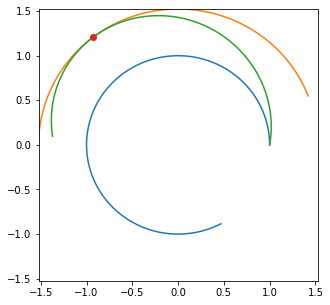

[ 0.50785443 -0.73636421]
[ 1.74638162 -2.7722516 ]
[  41.85120759 -445.02038511]
[-4.23755541  4.5874886 ]
[-0.71640957  0.87653582]
direction opimisation
error array= [6.00629765e-04 3.13831598e-04 2.68691241e-05 2.27314932e-04
 5.33906171e-04]
direction array (imput)= [1.37305953 1.37319364 1.37332776 1.37346187 1.37359599]
lowest index = 2


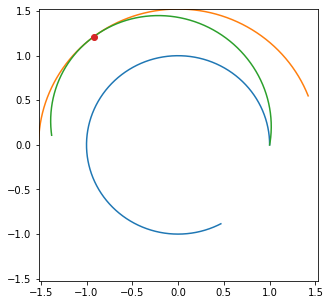

[ 1.74638162 -2.7722516 ]
[ 5.43142425 -9.97591044]
[  41.85120759 -445.02038511]
[-41.33685901  32.18047071]
[-4.23755541  4.5874886 ]
direction opimisation
error array= [3.13831598e-04 1.68552785e-04 2.68691241e-05 7.84857568e-05
 2.27314932e-04]
direction array (imput)= [1.37319364 1.3732607  1.37332776 1.37339482 1.37346187]
lowest index = 2


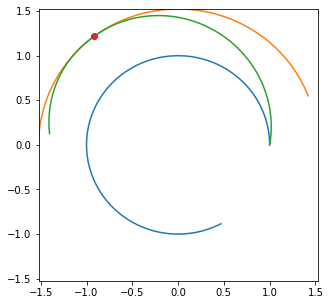

[ 5.43142425 -9.97591044]
[ 14.29381186 -31.88079334]
[  41.85120759 -445.02038511]
[-2130.84814733   486.83079576]
[-41.33685901  32.18047071]
direction opimisation
error array= [1.68552785e-04 9.61053182e-05 2.68691241e-05 1.21506329e-05
 7.84857568e-05]
direction array (imput)= [1.3732607  1.37329423 1.37332776 1.37336129 1.37339482]
lowest index = 3


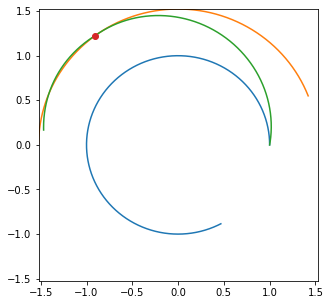

[-0.00058735  0.00150903]
[-0.01126896  0.02023091]
[-149.04131117   88.9299398 ]
[-0.01762492  0.01757084]
[-0.00132655  0.00102519]
Timing Optimisation
error array= [1.41167621e-02 3.73294648e-03 4.31200330e-05 3.60090375e-03
 1.38737349e-02]
Timing array (imput)= [1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
lowest index = 2


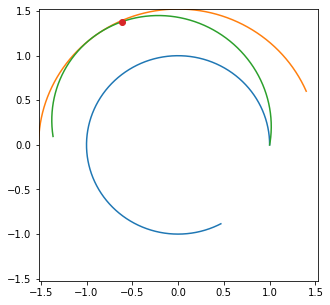

[-0.01126896  0.02023091]
[-0.18620025  0.27337894]
[-149.04131117   88.9299398 ]
[-0.25675131  0.28153694]
[-0.01762492  0.01757084]
Timing Optimisation
error array= [3.73294648e-03 9.87730864e-04 4.31200330e-05 9.20279149e-04
 3.60090375e-03]
Timing array (imput)= [1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
lowest index = 2


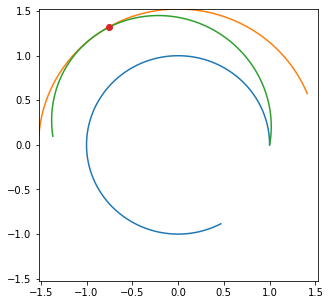

[-0.18620025  0.27337894]
[-2.54257216  3.05341296]
[-149.04131117   88.9299398 ]
[-3.57318763  3.65741706]
[-0.25675131  0.28153694]
Timing Optimisation
error array= [9.87730864e-04 2.84982162e-04 4.31200330e-05 2.51220422e-04
 9.20279149e-04]
Timing array (imput)= [1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
lowest index = 2


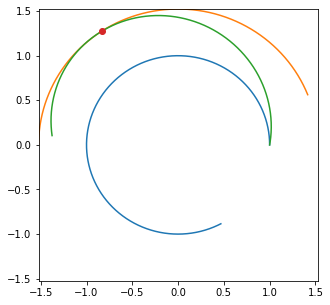

[-2.54257216  3.05341296]
[-21.31140318  19.20143058]
[-149.04131117   88.9299398 ]
[-31.64338002  24.87812393]
[-3.57318763  3.65741706]
Timing Optimisation
error array= [2.84982162e-04 1.06063649e-04 4.31200330e-05 8.95376477e-05
 2.51220422e-04]
Timing array (imput)= [1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
lowest index = 2


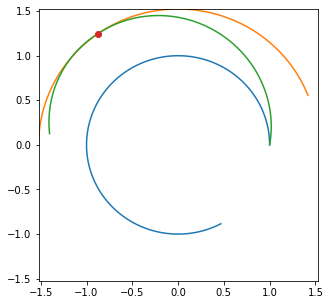

[-21.31140318  19.20143058]
[-71.58142574  51.78841565]
[-149.04131117   88.9299398 ]
[-98.62100707  63.42887398]
[-31.64338002  24.87812393]
Timing Optimisation
error array= [1.06063649e-04 6.04356467e-05 4.31200330e-05 5.24601028e-05
 8.95376477e-05]
Timing array (imput)= [1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
lowest index = 2


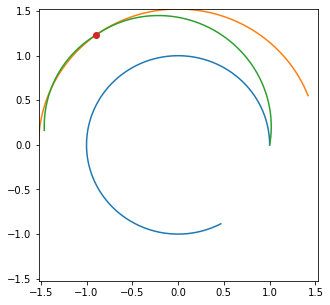

[-71.58142574  51.78841565]
[-117.08006359   72.90539786]
[-149.04131117   88.9299398 ]
[-140.68766442   82.79727283]
[-98.62100707  63.42887398]
Timing Optimisation
error array= [6.04356467e-05 4.83704450e-05 4.31200330e-05 4.44612500e-05
 5.24601028e-05]
Timing array (imput)= [1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
lowest index = 2


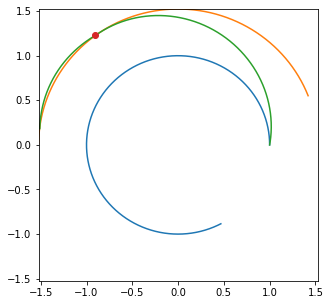

[-117.08006359   72.90539786]
[-137.77407333   81.30344924]
[-149.04131117   88.9299398 ]
[-150.11602518   89.47822983]
[-140.68766442   82.79727283]
Timing Optimisation
error array= [4.83704450e-05 4.49131644e-05 4.31200330e-05 4.29712561e-05
 4.44612500e-05]
Timing array (imput)= [1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
lowest index = 3


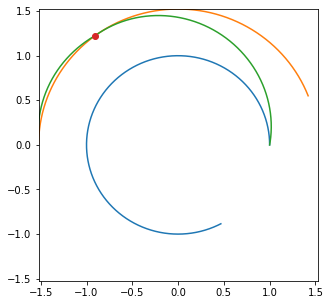

iterations= 1
[  65.70529568 -517.02343176]
[ 33844.49461962 -36781.22345395]
[-1875.79624762   507.80083081]
[-147.02200721   86.26636435]
[-41.30344848  32.67744909]
direction opimisation
error array= [2.48831228e-05 2.54090237e-06 1.28862894e-05 4.35096368e-05
 7.82764403e-05]
direction array (imput)= [1.37332776 1.37334452 1.37336129 1.37337805 1.37339482]
lowest index = 1


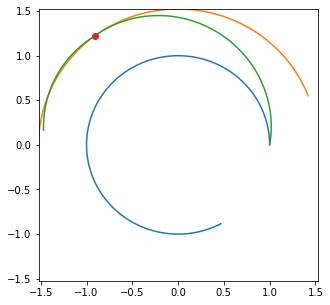

[ -184.4983962  -2077.89244482]
[    4.3960263  -2137.10595406]
[ -382.10020924 -2262.96245688]
[ -458.52918685 -2573.80243263]
[  101.94760074 -3160.30816106]
Timing Optimisation
error array= [1.24375640e-05 1.22881356e-05 1.18579239e-05 1.11101390e-05
 1.01023367e-05]
Timing array (imput)= [1.37332776 1.37333614 1.37334452 1.37335291 1.37336129]
lowest index = 4


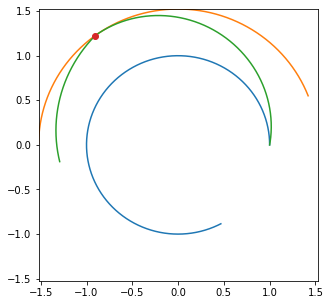

iterations= 2
[  59.40096203 -581.95572489]
[  101.94760074 -3160.30816106]
[-27088.8357557  -23558.48269544]
[-18173.02112157  13721.79851833]
[-1626.68869421   500.23768458]
direction opimisation
error array= [2.34870884e-05 1.01023367e-05 2.99814408e-06 3.76445895e-06
 1.37700836e-05]
direction array (imput)= [1.37332776 1.37333614 1.37334452 1.37335291 1.37336129]
lowest index = 2


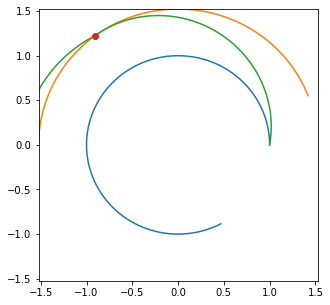

[  101.94760074 -3160.30816106]
[  2082.37101902 -11709.14617167]
[-27088.8357557  -23558.48269544]
[-309277.04159994   -9320.23445164]
[-18173.02112157  13721.79851833]
direction opimisation
error array= [1.01023367e-05 5.20902131e-06 2.99814408e-06 1.02123828e-06
 3.76445895e-06]
direction array (imput)= [1.37333614 1.37334033 1.37334452 1.37334871 1.37335291]
lowest index = 3


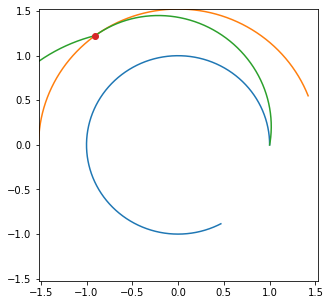

[ 1240.64574843 39358.65294728]
[-34775.48680956  72615.4896094 ]
[-90589.05385856  24491.41069767]
[-36186.52744542 -18392.54340254]
[-20034.07956632  46841.19010442]
Timing Optimisation
error array= [2.86267169e-06 2.00201104e-06 1.85439511e-06 2.81952938e-06
 2.51678338e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


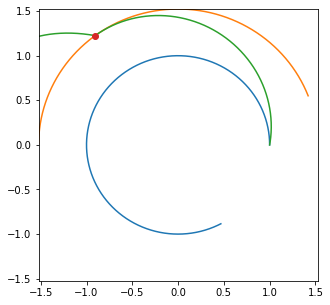

[-34775.48680956  72615.4896094 ]
[ -182.25634227 35150.15266107]
[-90589.05385856  24491.41069767]
[-27092.67713088  58975.46005635]
[-36186.52744542 -18392.54340254]
Timing Optimisation
error array= [2.00201104e-06 3.02993252e-06 1.85439511e-06 2.22984332e-06
 2.81952938e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


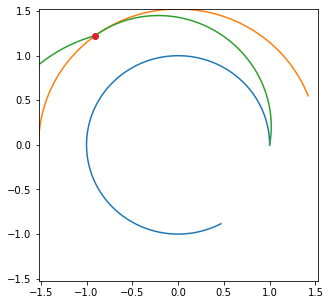

[ -182.25634227 35150.15266107]
[-61378.19583353 -14077.91855123]
[-90589.05385856  24491.41069767]
[-65280.51099447  62956.68514199]
[-27092.67713088  58975.46005635]
Timing Optimisation
error array= [3.02993252e-06 2.26373610e-06 1.85439511e-06 1.88631547e-06
 2.22984332e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


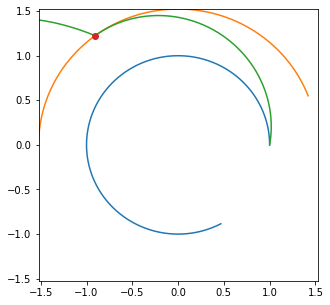

[-61378.19583353 -14077.91855123]
[-17264.91647457  56379.22546417]
[-90589.05385856  24491.41069767]
[-3703.23901543 39251.86952241]
[-65280.51099447  62956.68514199]
Timing Optimisation
error array= [2.26373610e-06 2.33941814e-06 1.85439511e-06 2.86092954e-06
 1.88631547e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


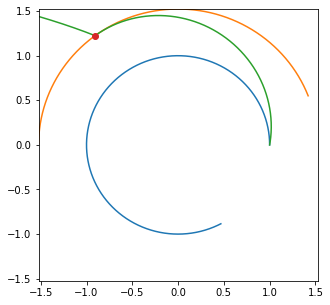

[-17264.91647457  56379.22546417]
[-58707.78347633  68005.59937538]
[-90589.05385856  24491.41069767]
[-53561.35935379 -16298.05114957]
[-3703.23901543 39251.86952241]
Timing Optimisation
error array= [2.33941814e-06 1.89523353e-06 1.85439511e-06 2.40081831e-06
 2.86092954e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


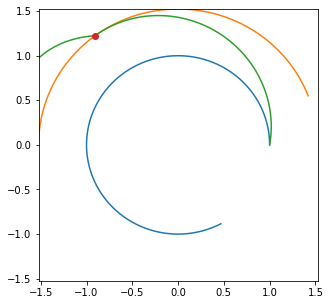

[-58707.78347633  68005.59937538]
[-2722.22405043 38249.28132135]
[-90589.05385856  24491.41069767]
[-19599.16234284  57292.78230606]
[-53561.35935379 -16298.05114957]
Timing Optimisation
error array= [1.89523353e-06 2.90094355e-06 1.85439511e-06 2.30852134e-06
 2.40081831e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


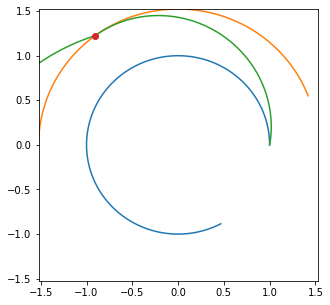

[-2722.22405043 38249.28132135]
[-55413.97094522 -15846.33037309]
[-90589.05385856  24491.41069767]
[-60467.74824306  66892.91274032]
[-19599.16234284  57292.78230606]
Timing Optimisation
error array= [2.90094355e-06 2.36622285e-06 1.85439511e-06 1.89174831e-06
 2.30852134e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


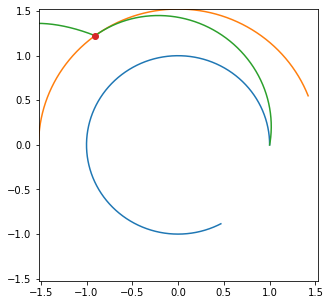

[-55413.97094522 -15846.33037309]
[-19006.2786723   57079.06158525]
[-90589.05385856  24491.41069767]
[-2961.07946043 38502.05442467]
[-60467.74824306  66892.91274032]
Timing Optimisation
error array= [2.36622285e-06 2.31603224e-06 1.85439511e-06 2.89079465e-06
 1.89174831e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


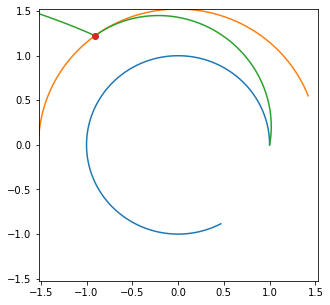

[-19006.2786723   57079.06158525]
[-60034.392711    67180.92054954]
[-90589.05385856  24491.41069767]
[-54944.51684613 -15965.08522988]
[-2961.07946043 38502.05442467]
Timing Optimisation
error array= [2.31603224e-06 1.89254052e-06 1.85439511e-06 2.37485436e-06
 2.89079465e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 2


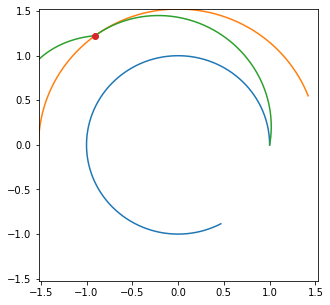

[-60034.392711    67180.92054954]
[-83297.58174291  52862.23635634]
[-90589.05385856  24491.41069767]
[-77104.50847086  -2079.03170948]
[-54944.51684613 -15965.08522988]
Timing Optimisation
error array= [1.89254052e-06 1.80858482e-06 1.85439511e-06 2.04541147e-06
 2.37485436e-06]
Timing array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 1


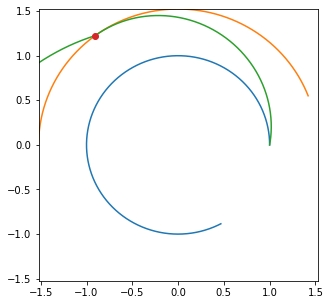

iterations= 3
[-26094.7846465  -25442.17869374]
[-107551.60293802 -292160.4528844 ]
[-62426.28146417 -38284.95412094]
[-72671.12583309  62286.18328991]
[-28633.56593253   7681.67359362]
direction opimisation
error array= [2.97563844e-06 1.01810001e-06 2.09919132e-06 1.83619068e-06
 3.29925550e-06]
direction array (imput)= [1.37334452 1.37334662 1.37334871 1.37335081 1.37335291]
lowest index = 1


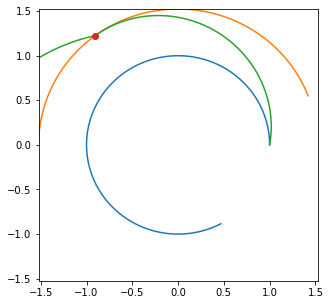

[ 96603.09767302 -56176.97482487]
[105063.11306714 -80106.60908389]
[ 106915.02684672 -110383.54883444]
[  96451.24986095 -143126.162046  ]
[  70200.30146    -168973.61414291]
Timing Optimisation
error array= [1.69932390e-06 1.56285069e-06 1.44910843e-06 1.36738042e-06
 1.32801380e-06]
Timing array (imput)= [1.37334452 1.37334557 1.37334662 1.37334767 1.37334871]
lowest index = 4


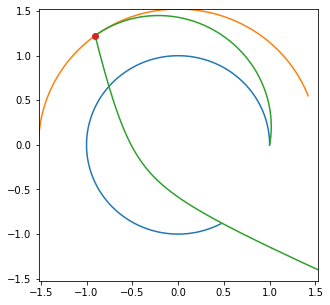

iterations= 4
[ 36565.19448545 -21318.74991124]
[  70200.30146    -168973.61414291]
[-59299.15068179 -61926.44518276]
[35993.68907856 24593.93715638]
[26683.32145044 36654.94898283]
direction opimisation
error array= [2.76118258e-06 1.32801380e-06 1.94003172e-06 2.72074478e-06
 2.66787592e-06]
direction array (imput)= [1.37334452 1.37334557 1.37334662 1.37334767 1.37334871]
lowest index = 1


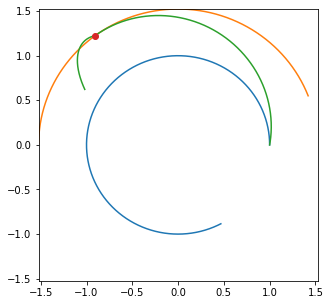

[ 61999.40905688 -44389.49311191]
[ 62894.35098141 -47336.72570284]
[ 63681.65388145 -50440.60259919]
[ 64340.76721799 -53699.70077626]
[ 64849.36400379 -57110.10283936]
Timing Optimisation
error array= [2.05718865e-06 2.02471305e-06 1.99305809e-06 1.96228802e-06
 1.93247057e-06]
Timing array (imput)= [1.37334452 1.37334505 1.37334557 1.37334609 1.37334662]
lowest index = 4


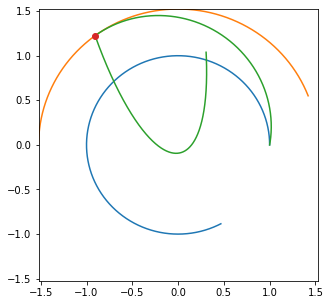

iterations= 5
[ 36565.19448545 -21318.74991124]
[ 64849.36400379 -57110.10283936]
[  70200.30146    -168973.61414291]
[ -58976.3915162  -172560.76069432]
[-59299.15068179 -61926.44518276]
direction opimisation
error array= [2.76118258e-06 1.93247057e-06 1.32801380e-06 1.33025175e-06
 1.94003172e-06]
direction array (imput)= [1.37334452 1.37334505 1.37334557 1.37334609 1.37334662]
lowest index = 2


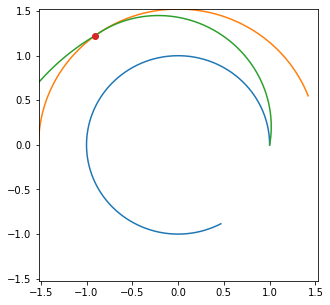

[ 64849.36400379 -57110.10283936]
[-29687.44229533 -26001.33215379]
[  70200.30146    -168973.61414291]
[58671.39904469 -5827.17061784]
[ -58976.3915162  -172560.76069432]
direction opimisation
error array= [1.93247057e-06 2.85955529e-06 1.32801380e-06 2.33948635e-06
 1.33025175e-06]
direction array (imput)= [1.37334505 1.37334531 1.37334557 1.37334583 1.37334609]
lowest index = 2


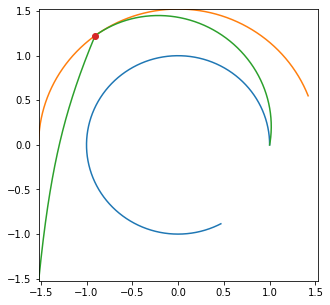

[-29687.44229533 -26001.33215379]
[ 71481.10713406 -29826.67470499]
[  70200.30146    -168973.61414291]
[-43925.421709   -56880.99734848]
[58671.39904469 -5827.17061784]
direction opimisation
error array= [2.85955529e-06 2.04115753e-06 1.32801380e-06 2.11901584e-06
 2.33948635e-06]
direction array (imput)= [1.37334531 1.37334544 1.37334557 1.3733457  1.37334583]
lowest index = 2


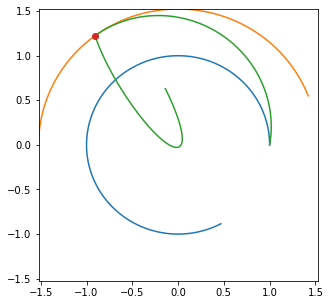

[ 71481.10713406 -29826.67470499]
[-35583.86290779 -37167.1045067 ]
[  70200.30146    -168973.61414291]
[ 66679.25210719 -16348.52223378]
[-43925.421709   -56880.99734848]
direction opimisation
error array= [2.04115753e-06 2.50429904e-06 1.32801380e-06 2.16803346e-06
 2.11901584e-06]
direction array (imput)= [1.37334544 1.37334551 1.37334557 1.37334564 1.3733457 ]
lowest index = 2


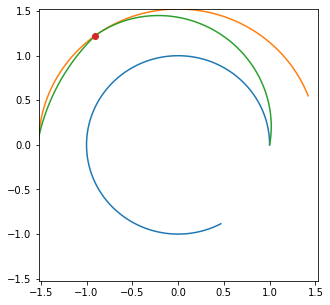

[-35583.86290779 -37167.1045067 ]
[ -36522.57039784 -115774.90474358]
[  70200.30146    -168973.61414291]
[104005.0005161  -66932.59365024]
[ 66679.25210719 -16348.52223378]
direction opimisation
error array= [2.50429904e-06 1.63039133e-06 1.32801380e-06 1.61528005e-06
 2.16803346e-06]
direction array (imput)= [1.37334551 1.37334554 1.37334557 1.3733456  1.37334564]
lowest index = 2


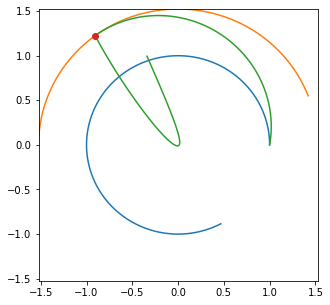

[ -36522.57039784 -115774.90474358]
[   3886.13853207 -165555.80857103]
[  70200.30146    -168973.61414291]
[ 107730.9425006  -119382.99169498]
[104005.0005161  -66932.59365024]
direction opimisation
error array= [1.63039133e-06 1.39594229e-06 1.32801380e-06 1.41660797e-06
 1.61528005e-06]
direction array (imput)= [1.37334554 1.37334555 1.37334557 1.37334559 1.3733456 ]
lowest index = 2


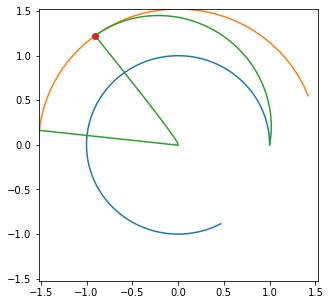

[   3886.13853207 -165555.80857103]
[  37001.75609122 -175685.42276877]
[  70200.30146    -168973.61414291]
[  95100.7455904  -147755.08545805]
[ 107730.9425006  -119382.99169498]
direction opimisation
error array= [1.39594229e-06 1.34066186e-06 1.32801380e-06 1.35517450e-06
 1.41660797e-06]
direction array (imput)= [1.37334555 1.37334556 1.37334557 1.37334558 1.37334559]
lowest index = 2


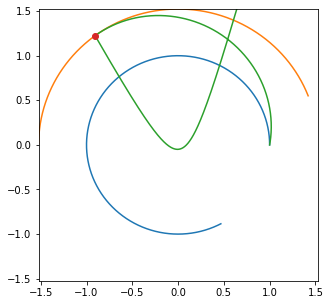

[  37001.75609122 -175685.42276877]
[  54169.56284065 -174458.12385021]
[  70200.30146    -168973.61414291]
[  84077.80058556 -159775.66699623]
[  95100.7455904  -147755.08545805]
direction opimisation
error array= [1.34066186e-06 1.32910870e-06 1.32801380e-06 1.33691545e-06
 1.35517450e-06]
direction array (imput)= [1.37334556 1.37334557 1.37334557 1.37334558 1.37334558]
lowest index = 2


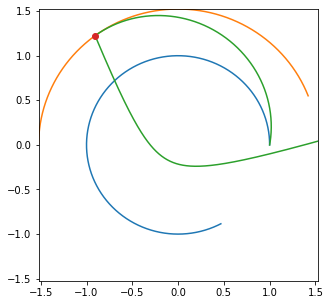

[  54169.56284065 -174458.12385021]
[  62397.58701614 -172223.69648255]
[  70200.30146    -168973.61414291]
[  77461.05327791 -164789.15036586]
[  84077.80058556 -159775.66699623]
direction opimisation
error array= [1.32910870e-06 1.32727807e-06 1.32801380e-06 1.33125117e-06
 1.33691545e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334558]
lowest index = 1


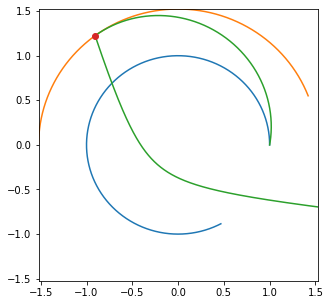

[  67227.55009417 -169912.62552113]
[  65061.91258628 -170921.62970609]
[  62854.94835077 -171852.52655021]
[  60609.34726983 -172703.32733546]
[  58327.91328336 -173472.18980547]
Timing Optimisation
error array= [1.32891097e-06 1.32834033e-06 1.32797541e-06 1.32781784e-06
 1.32786924e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 3


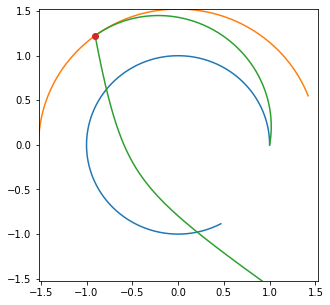

iterations= 6
[  55339.94537674 -174158.85949996]
[  59472.92378081 -173098.11440607]
[  63512.39214141 -171777.01982439]
[  67440.50412748 -170204.32066791]
[  71241.53669865 -168390.36557546]
direction opimisation
error array= [1.32887143e-06 1.32781731e-06 1.32740954e-06 1.32764152e-06
 1.32850504e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


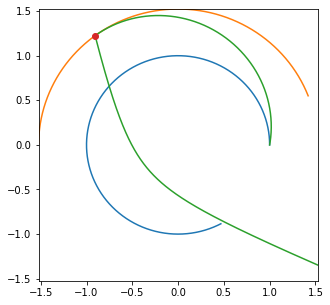

[  59472.92378081 -173098.11440607]
[  61504.72329841 -172469.81309435]
[  63512.39214141 -171777.01982439]
[  65490.60423687 -171021.75624062]
[  67440.50412748 -170204.32066791]
direction opimisation
error array= [1.32781731e-06 1.32753326e-06 1.32740954e-06 1.32744623e-06
 1.32764152e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


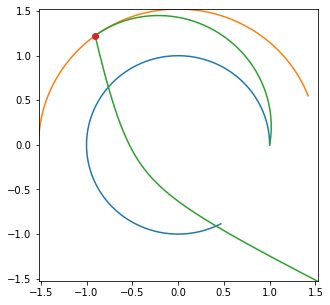

[  61504.72329841 -172469.81309435]
[  62511.24375461 -172131.55867875]
[  63512.39214141 -171777.01982439]
[  64504.26163412 -171407.44835889]
[  65490.60423687 -171021.75624062]
direction opimisation
error array= [1.32753326e-06 1.32745149e-06 1.32740954e-06 1.32740811e-06
 1.32744623e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 3


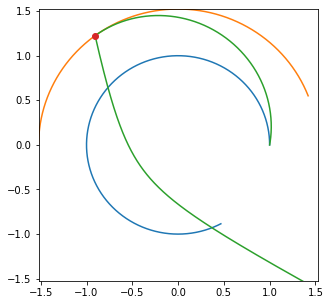

[  68241.42158254 -169680.47092291]
[  67171.14339562 -170211.70241282]
[  66089.83307936 -170723.88361544]
[  64997.85997869 -171216.70272989]
[  63895.54762439 -171689.90055562]
Timing Optimisation
error array= [1.32832943e-06 1.32797590e-06 1.32767343e-06 1.32742228e-06
 1.32722267e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


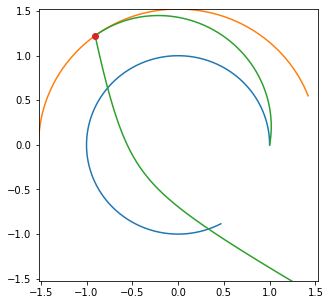

iterations= 7
[  62397.58701614 -172223.69648255]
[  62898.29431292 -172049.80361579]
[  63397.73533472 -171871.83937421]
[  63895.54762439 -171689.90055562]
[  64392.62163696 -171503.71744921]
direction opimisation
error array= [1.32727807e-06 1.32724969e-06 1.32723118e-06 1.32722267e-06
 1.32722394e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 3


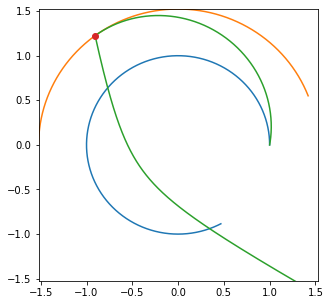

[  65244.708532   -171119.64149775]
[  64970.64128808 -171240.87762199]
[  64695.910976   -171360.89935678]
[  64420.60849449 -171479.66966292]
[  64144.53366528 -171597.23811853]
Timing Optimisation
error array= [1.32743294e-06 1.32737537e-06 1.32732101e-06 1.32726984e-06
 1.32722197e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


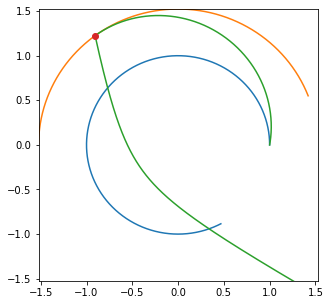

iterations= 8
[  63397.73533472 -171871.83937421]
[  63647.21827565 -171781.26303134]
[  63895.54762439 -171689.90055562]
[  64144.53366528 -171597.23811853]
[  64392.62163696 -171503.71744921]
direction opimisation
error array= [1.32723118e-06 1.32722556e-06 1.32722267e-06 1.32722197e-06
 1.32722394e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 3


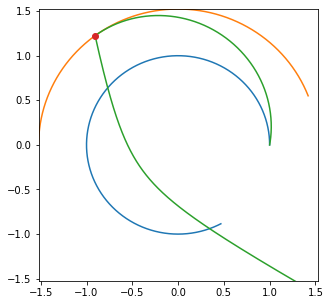

[  64544.05288328 -171432.61867567]
[  64475.09111666 -171462.28316726]
[  64406.18532164 -171491.83719575]
[  64337.13738685 -171521.36150648]
[  64268.25215278 -171550.72973638]
Timing Optimisation
error array= [1.32727196e-06 1.32725936e-06 1.32724695e-06 1.32723471e-06
 1.32722269e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


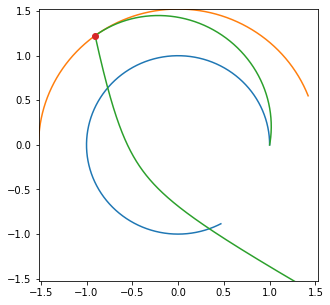

iterations= 9
[  63895.54762439 -171689.90055562]
[  64020.46667988 -171643.58234029]
[  64144.53366528 -171597.23811853]
[  64268.25215278 -171550.72973638]
[  64392.62163696 -171503.71744921]
direction opimisation
error array= [1.32722267e-06 1.32722191e-06 1.32722197e-06 1.32722269e-06
 1.32722394e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 1


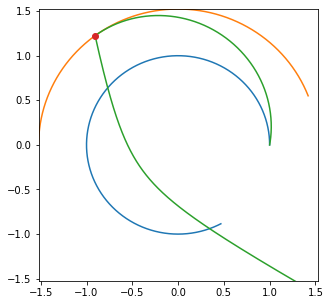

[  64027.3575142  -171637.66124839]
[  64010.16662135 -171644.9038251 ]
[  63992.79401815 -171652.20193667]
[  63975.57303717 -171659.4426585 ]
[  63958.30405836 -171666.68731397]
Timing Optimisation
error array= [1.32723329e-06 1.32723047e-06 1.32722768e-06 1.32722489e-06
 1.32722214e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


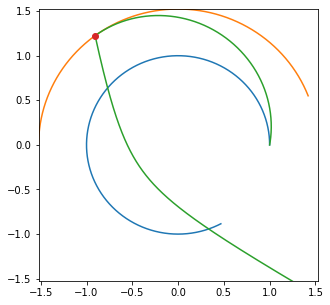

iterations= 10
[  63895.54762439 -171689.90055562]
[  63958.30405836 -171666.68731397]
[  64020.46667988 -171643.58234029]
[  64082.63340393 -171620.38983815]
[  64144.53366528 -171597.23811853]
direction opimisation
error array= [1.32722267e-06 1.32722214e-06 1.32722191e-06 1.32722189e-06
 1.32722197e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 3


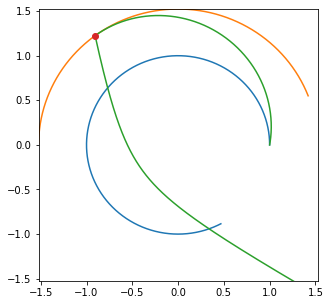

[  64130.50490324 -171601.64690607]
[  64126.19071049 -171603.46870653]
[  64121.8543447  -171605.30040912]
[  64117.4561175  -171607.15139086]
[  64113.2627273 -171608.9319705]
Timing Optimisation
error array= [1.32722481e-06 1.32722409e-06 1.32722338e-06 1.32722267e-06
 1.32722195e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


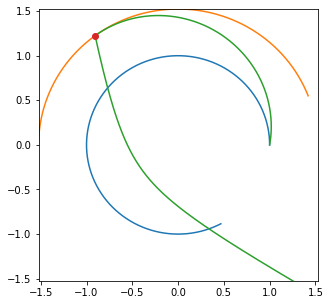

iterations= 11
[  64020.46667988 -171643.58234029]
[  64050.56431818 -171632.30200056]
[  64082.63340393 -171620.38983815]
[  64113.2627273 -171608.9319705]
[  64144.53366528 -171597.23811853]
direction opimisation
error array= [1.32722191e-06 1.32722209e-06 1.32722189e-06 1.32722195e-06
 1.32722197e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


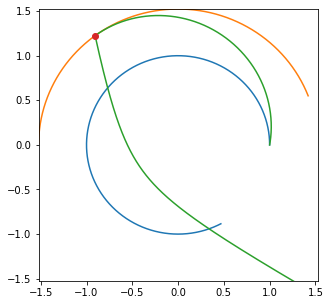

[  64050.56431818 -171632.30200056]
[  64067.42292354 -171626.10173111]
[  64082.63340393 -171620.38983815]
[  64098.14427388 -171614.61594368]
[  64113.2627273 -171608.9319705]
direction opimisation
error array= [1.32722209e-06 1.32722177e-06 1.32722189e-06 1.32722182e-06
 1.32722195e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 1


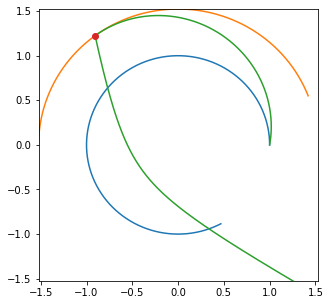

[  64062.81908211 -171627.53787027]
[  64061.79020604 -171627.97714949]
[  64060.70349228 -171628.43560176]
[  64059.66795859 -171628.87082302]
[  64058.6183761  -171629.31755736]
Timing Optimisation
error array= [1.32722273e-06 1.32722255e-06 1.32722237e-06 1.32722220e-06
 1.32722201e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


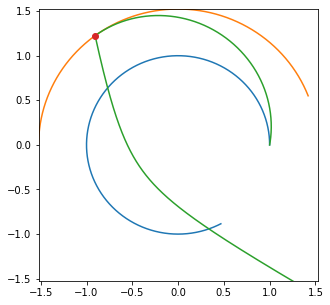

iterations= 12
[  64050.56431818 -171632.30200056]
[  64058.6183761  -171629.31755736]
[  64067.42292354 -171626.10173111]
[  64075.08836622 -171623.22281513]
[  64082.63340393 -171620.38983815]
direction opimisation
error array= [1.32722209e-06 1.32722201e-06 1.32722177e-06 1.32722183e-06
 1.32722189e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


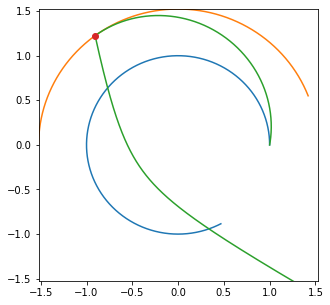

[  64058.6183761  -171629.31755736]
[  64062.91924948 -171627.73739455]
[  64067.42292354 -171626.10173111]
[  64071.31789818 -171624.64090208]
[  64075.08836622 -171623.22281513]
direction opimisation
error array= [1.32722201e-06 1.32722193e-06 1.32722177e-06 1.32722180e-06
 1.32722183e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


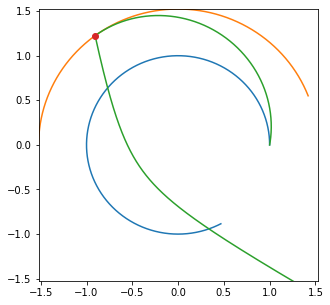

[  64062.91924948 -171627.73739455]
[  64064.68428739 -171627.06899948]
[  64067.42292354 -171626.10173111]
[  64069.26405723 -171625.40162397]
[  64071.31789818 -171624.64090208]
direction opimisation
error array= [1.32722193e-06 1.32722196e-06 1.32722177e-06 1.32722182e-06
 1.32722180e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


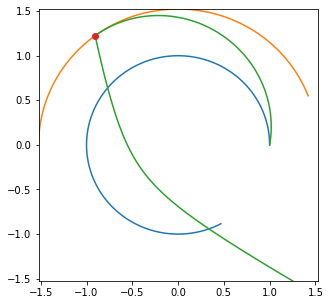

[  64064.68428739 -171627.06899948]
[  64065.85163704 -171626.64421666]
[  64067.42292354 -171626.10173111]
[  64068.4211485  -171625.72779355]
[  64069.26405723 -171625.40162397]
direction opimisation
error array= [1.32722196e-06 1.32722192e-06 1.32722177e-06 1.32722178e-06
 1.32722182e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


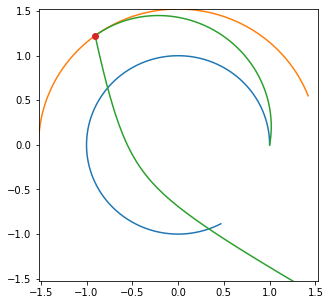

[  64065.85163704 -171626.64421666]
[  64066.72024255 -171626.3493751 ]
[  64067.42292354 -171626.10173111]
[  64067.89521029 -171625.92354421]
[  64068.4211485  -171625.72779355]
direction opimisation
error array= [1.32722192e-06 1.32722182e-06 1.32722177e-06 1.32722178e-06
 1.32722178e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


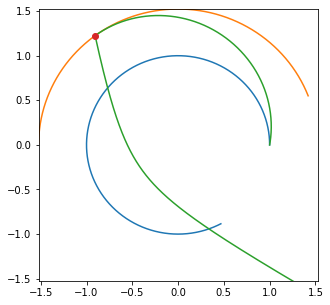

[  64066.72024255 -171626.3493751 ]
[  64067.10839256 -171626.21642903]
[  64067.42292354 -171626.10173111]
[  64067.61059216 -171626.02791851]
[  64067.89521029 -171625.92354421]
direction opimisation
error array= [1.32722182e-06 1.32722178e-06 1.32722177e-06 1.32722179e-06
 1.32722178e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


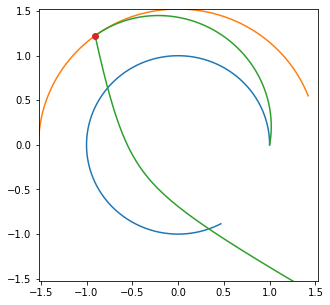

[  64067.10839256 -171626.21642903]
[  64067.29517972 -171626.14960237]
[  64067.42292354 -171626.10173111]
[  64067.53277128 -171626.05985965]
[  64067.61059216 -171626.02791851]
direction opimisation
error array= [1.32722178e-06 1.32722177e-06 1.32722177e-06 1.32722178e-06
 1.32722179e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 1


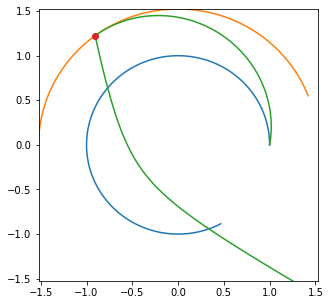

[  64068.26983321 -171625.72967476]
[  64068.04306707 -171625.82904776]
[  64067.7756794  -171625.94075315]
[  64067.50778826 -171626.05430321]
[  64067.22183461 -171626.17585246]
Timing Optimisation
error array= [1.32722196e-06 1.32722191e-06 1.32722187e-06 1.32722183e-06
 1.32722178e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


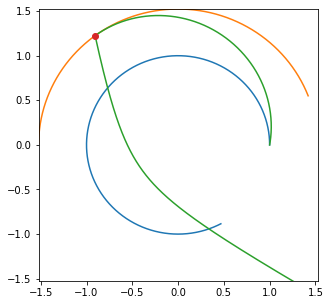

iterations= 13
[  64067.10839256 -171626.21642903]
[  64067.22183461 -171626.17585246]
[  64067.29517972 -171626.14960237]
[  64067.35503373 -171626.12716063]
[  64067.42292354 -171626.10173111]
direction opimisation
error array= [1.32722178e-06 1.32722178e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


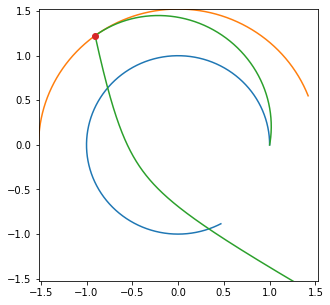

[  64067.22183461 -171626.17585246]
[  64067.27324894 -171626.15828427]
[  64067.29517972 -171626.14960237]
[  64067.31095572 -171626.14273046]
[  64067.35503373 -171626.12716063]
direction opimisation
error array= [1.32722178e-06 1.32722177e-06 1.32722177e-06 1.32722178e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 1


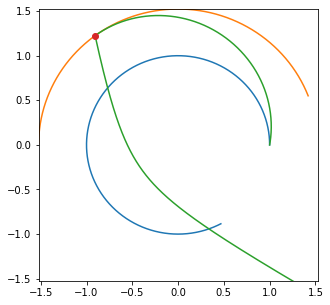

[  64067.51652972 -171626.05089766]
[  64067.44885337 -171626.07967524]
[  64067.37840087 -171626.10985825]
[  64067.31273315 -171626.13832485]
[  64067.2312128  -171626.17203933]
Timing Optimisation
error array= [1.32722183e-06 1.32722182e-06 1.32722180e-06 1.32722179e-06
 1.32722178e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


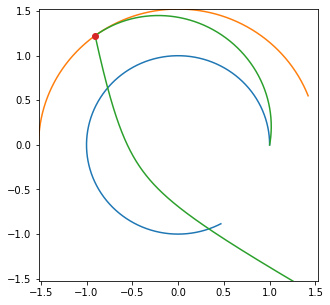

iterations= 14
[  64067.22183461 -171626.17585246]
[  64067.2312128  -171626.17203933]
[  64067.27324894 -171626.15828427]
[  64067.28327457 -171626.15414368]
[  64067.29517972 -171626.14960237]
direction opimisation
error array= [1.32722178e-06 1.32722178e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


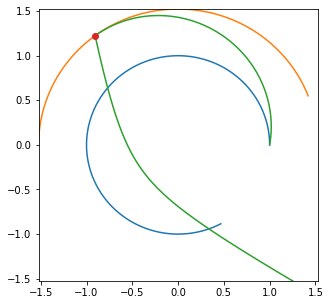

[  64067.2312128  -171626.17203933]
[  64067.23556159 -171626.17012861]
[  64067.27324894 -171626.15828427]
[  64067.27723367 -171626.15645466]
[  64067.28327457 -171626.15414368]
direction opimisation
error array= [1.32722178e-06 1.32722178e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


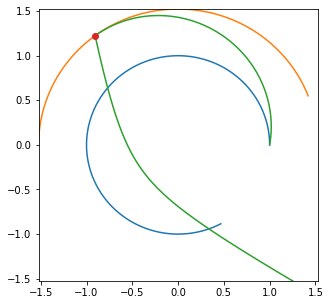

[  64067.23556159 -171626.17012861]
[  64067.23692438 -171626.16936827]
[  64067.27324894 -171626.15828427]
[  64067.27585913 -171626.15703958]
[  64067.27723367 -171626.15645466]
direction opimisation
error array= [1.32722178e-06 1.32722178e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


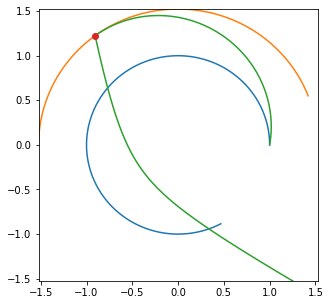

[  64067.23692438 -171626.16936827]
[  64067.27261988 -171626.15848636]
[  64067.27324894 -171626.15828427]
[  64067.27430691 -171626.15760991]
[  64067.27585913 -171626.15703958]
direction opimisation
error array= [1.32722178e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


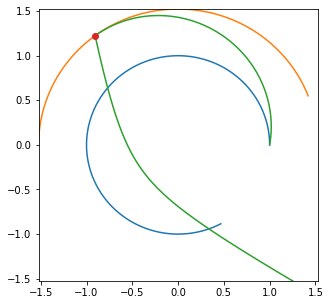

[  64067.27261988 -171626.15848636]
[  64067.27349454 -171626.15819343]
[  64067.27324894 -171626.15828427]
[  64067.27417007 -171626.15772555]
[  64067.27430691 -171626.15760991]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 1


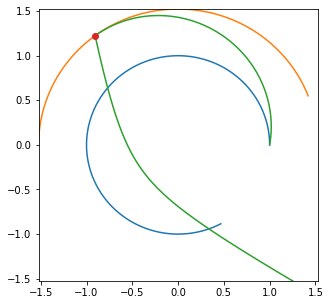

[  64067.35302301 -171626.12544131]
[  64067.33101974 -171626.13471992]
[  64067.31086841 -171626.14286602]
[  64067.29373421 -171626.15000702]
[  64067.27349454 -171626.15819343]
Timing Optimisation
error array= [1.32722178e-06 1.32722178e-06 1.32722178e-06 1.32722177e-06
 1.32722177e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


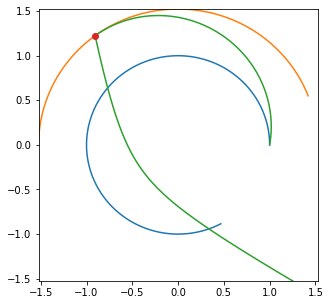

iterations= 15
[  64067.27261988 -171626.15848636]
[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 3


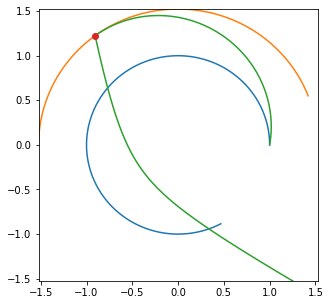

[  64067.29389045 -171626.14986126]
[  64067.28859809 -171626.15207511]
[  64067.28435398 -171626.15362968]
[  64067.27998478 -171626.15547529]
[  64067.27324894 -171626.15828427]
Timing Optimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
Timing array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 4


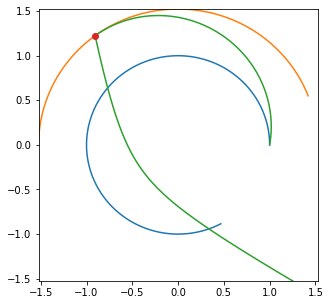

iterations= 16
[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


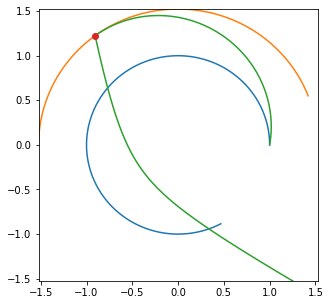

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


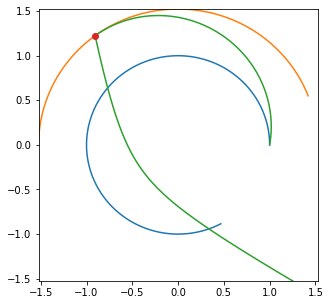

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


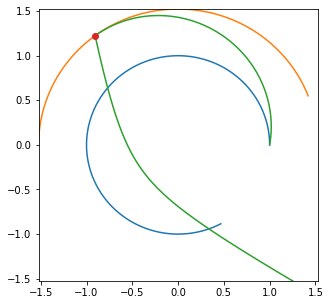

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


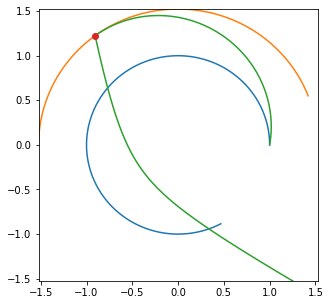

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


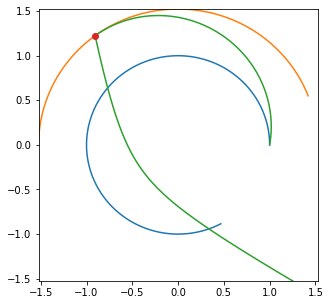

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


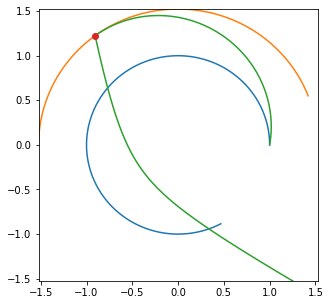

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


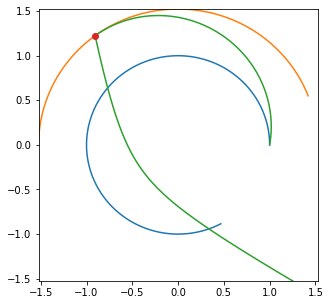

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


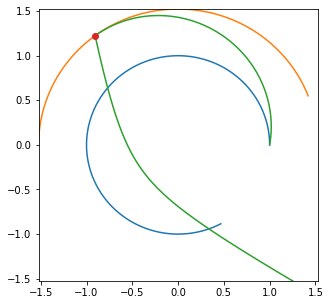

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


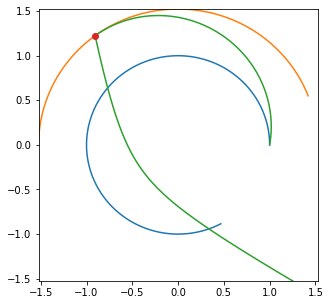

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


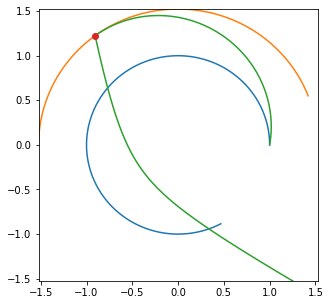

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


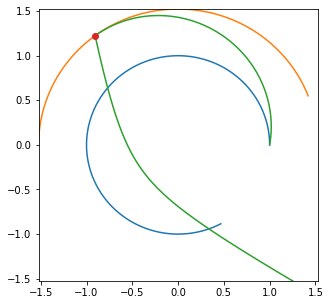

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


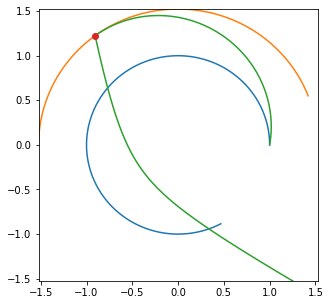

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


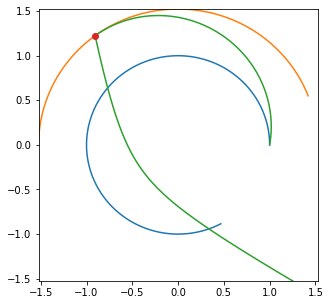

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


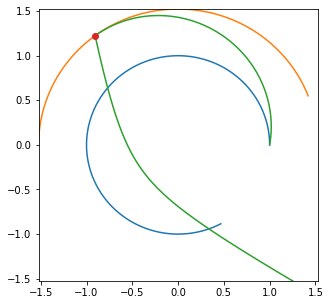

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


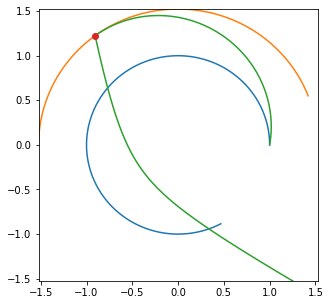

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


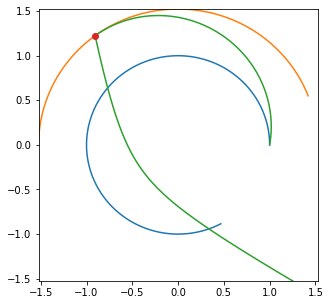

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


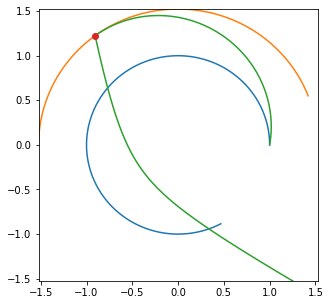

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


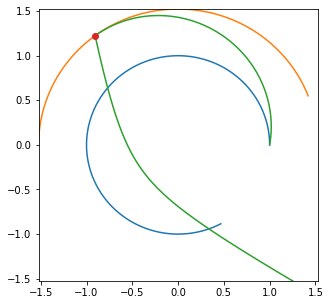

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


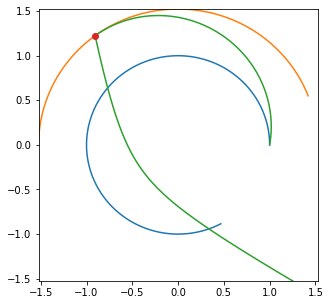

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


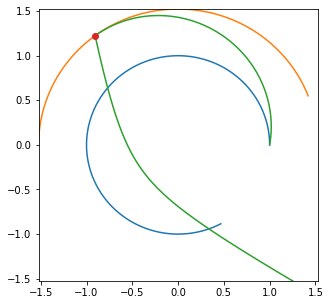

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


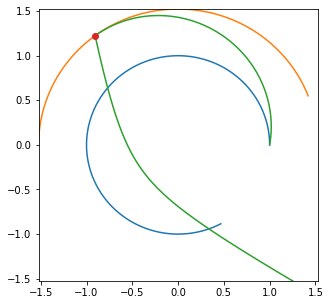

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


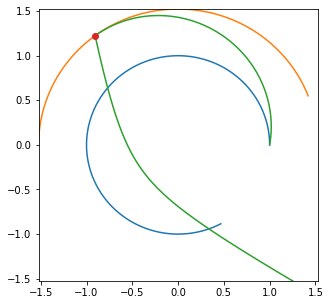

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


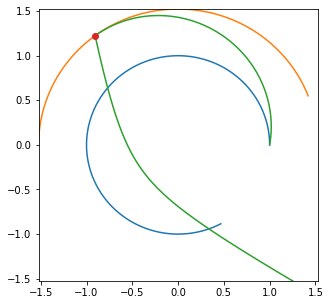

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


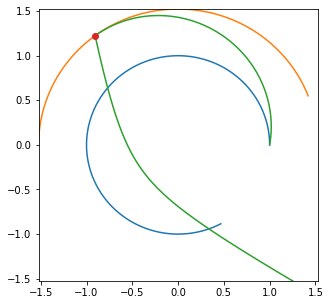

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


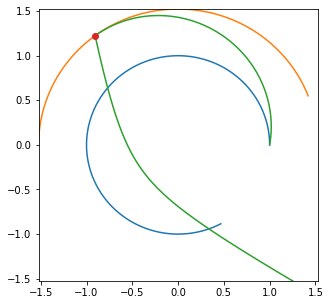

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


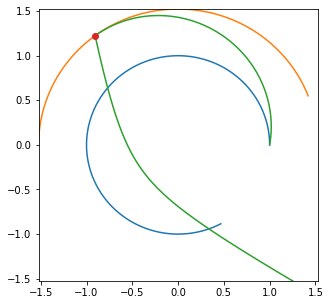

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


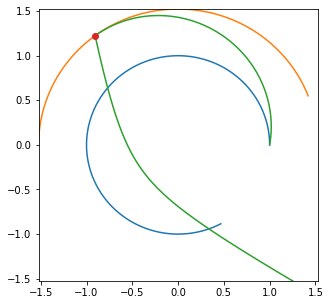

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


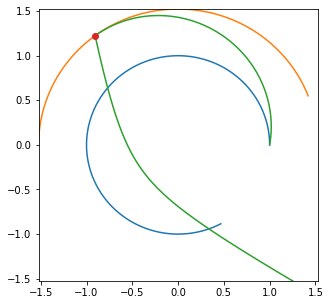

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


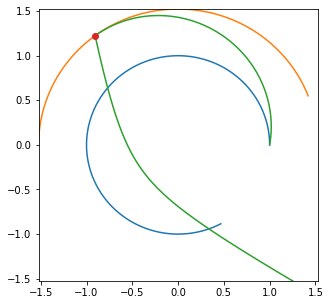

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


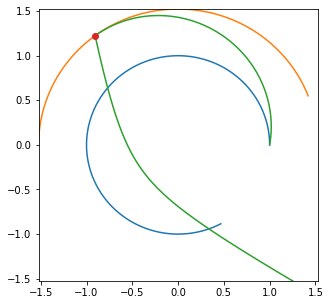

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


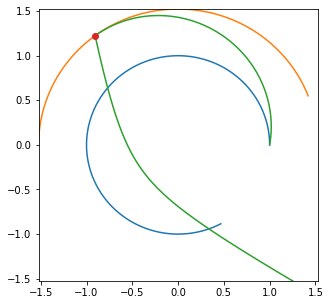

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


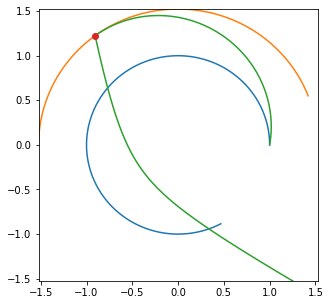

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


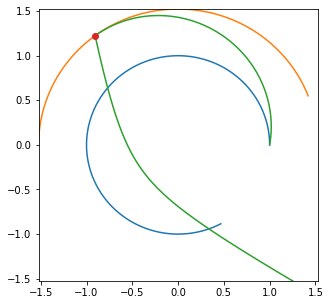

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


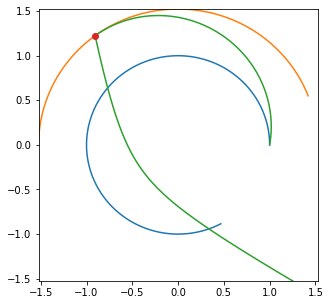

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


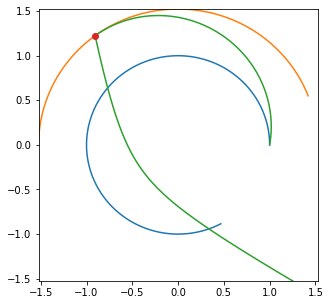

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


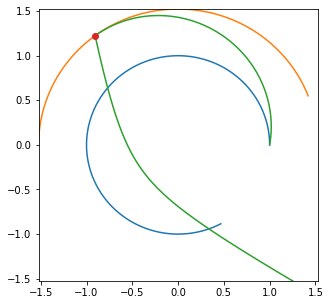

[  64067.27349454 -171626.15819343]
[  64067.27349454 -171626.15819343]
[  64067.2730927  -171626.15843003]
[  64067.27324894 -171626.15828427]
[  64067.27324894 -171626.15828427]
direction opimisation
error array= [1.32722177e-06 1.32722177e-06 1.32722177e-06 1.32722177e-06
 1.32722177e-06]
direction array (imput)= [1.37334557 1.37334557 1.37334557 1.37334557 1.37334557]
lowest index = 2


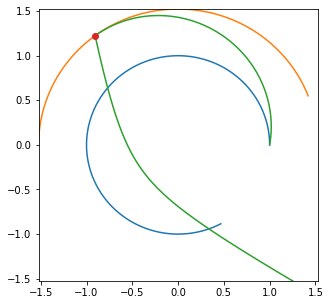

KeyboardInterrupt: 

In [102]:
j=0
theta_array=np.linspace(0.95*thetatrue,1.05*thetatrue,5)
error_array=np.ones(5)*10
p=0
r4_54[0 ,: ]=np.array((100000 ,100000))
mstart_array=np.linspace(0.9*marsstart,1.1*marsstart,5)
rmars=1.52366214
vmars=np.sqrt(rmars*G*m1_51)/rmars
tol=0.9 *HMorbit/(rmars)


r3_54[0 ,: ] = np.array((np.cos(marsstart) ,np.sin(marsstart)))*rmars
v3_54[0 ,: ] = np.array((-np.sin(marsstart) ,np.cos(marsstart)))*vmars

diffZZ=np.zeros(Nsteps)

while j < 35 and np.min(error_array)>HMorbit:
    print("iterations=", j)
    
    minimize = 0
    while minimize ==0:
        for æ in range(5):
            r4_54[0 ,: ] = np.array((np.cos(theta_array[æ]) ,np.sin(theta_array[æ])))*LEorbit+np.array((1 ,0 ))
            v4_54[0 ,: ] = np.array((np.cos(theta_array[æ]) ,np.sin(theta_array[æ])))*v_probe
        
            å=0
            p=0
            while p <Nsteps:
                # define forces on the timestep
                diffZZ[p]=np.linalg.norm(r4_54[p]-r3_54[p])
                
                f2 = force(r2_54[p],r1_54[p],m2_54,m1_54) + force(r2_54[p],r3_54[p],m2_54,m3_54)
                f3 = force(r3_54[p],r1_54[p],m3_54,m1_54) + force(r3_54[p],r2_54[p],m3_54,m2_54)
                f4 = (force(r4_54[p],r2_54[p],   1,m2_54) + force(r4_54[p],r1_54[p],    1,m1_54) +
                      force(r4_54[p],r3_54[p],   1,m3_54))
    
                #define position on the next timestep
                r2_54[p+1] = r2_54[p]+v2_54[p]*dt+f2/(2*m2_54)*dt**2
                r3_54[p+1] = r3_54[p]+v3_54[p]*dt+f3/(2*m3_54)*dt**2
                r4_54[p+1] = r4_54[p]+v4_54[p]*dt+f4/(2)      *dt**2
      
                # define forces on the next timestep
                f2new = force(r2_54[p],r1_54[p],m2_54,m1_54) + force(r2_54[p],r3_54[p],m2_54,m3_54)
                f3new = force(r3_54[p],r1_54[p],m3_54,m1_54) + force(r3_54[p],r2_54[p],m3_54,m2_54)
                f4new = (force(r4_54[p],r2_54[p],   1,m2_54) + force(r4_54[p],r1_54[p],    1,m1_54) +
                         force(r4_54[p],r3_54[p],   1,m3_54))
    
                #define vepocities on the next timestep
                v2_54[p+1] = v2_54[p]+dt*(f2+f2new)/(2*m2_54)
                v3_54[p+1] = v3_54[p]+dt*(f3+f3new)/(2*m3_54)
                v4_54[p+1] = v4_54[p]+dt*(f4+f4new)/(2)

                p+=1
        
            print(force(r4_54[np.argmin(diff[:-1])],r3_54[np.argmin(diff[:-1])],   1,m3_54))
            error_array[æ]=np.min(diff[:-1])
    
        lowest_index=np.argmin(error_array)
        print("direction opimisation")
        print("error array=",error_array)
        print("direction array (imput)=",theta_array)
        print("lowest index =",np.argmin(error_array))
    
        if lowest_index<4 and lowest_index>0:
            theta_array=np.linspace(theta_array[lowest_index-1],theta_array[lowest_index+1],5)
        elif lowest_index==0:
            theta_array=np.linspace(theta_array[0],theta_array[1],5)
        elif lowest_index==4:
            theta_array=np.linspace(theta_array[3],theta_array[4],5)
            
        if lowest_index!=2:
            minimize = 1
    
        plt.figure(figsize=(5,5))
        plt.plot(r2_54[:p, 0], r2_54[:p, 1], label='Earth')
        plt.plot(r3_54[:p, 0], r3_54[:p, 1], label='Mars')
        plt.plot(r4_54[:p, 0], r4_54[:p, 1], label='Probe')
        plt.plot(r4_54[np.argmin(diff[:-1]), 0], r4_54[np.argmin(diff[:-1]), 1],"o", label='Min distance')
        plt.xlim((-rmars,rmars))
        plt.ylim((-rmars,rmars))
        plt.show()
        
        r4_54[0 ,: ] = np.array((np.cos(theta_array[lowest_index]) ,np.sin(theta_array[lowest_index])))*LEorbit+np.array((1 ,0 ))
        v4_54[0 ,: ] = np.array((np.cos(theta_array[lowest_index]) ,np.sin(theta_array[lowest_index])))*v_probe
        if np.sort(error_array)[0]-np.sort(error_array)[1] < 10**(-9):
            break
    
    minimize = 0
    while minimize ==0:
        for æ in range(5):
            r3_54[0 ,: ] = np.array((np.cos(mstart_array[æ]) ,np.sin(mstart_array[æ])))*rmars
            v3_54[0 ,: ] = np.array((-np.sin(mstart_array[æ]) ,np.cos(mstart_array[æ])))*vmars
        
            å=0
            p=0
            while p <int(k*1.5):
                # define forces on the timestep
                diffZZ[p]=np.linalg.norm(r4_54[p]-r3_54[p])
                
                f2 = force(r2_54[p],r1_54[p],m2_54,m1_54) + force(r2_54[p],r3_54[p],m2_54,m3_54)
                f3 = force(r3_54[p],r1_54[p],m3_54,m1_54) + force(r3_54[p],r2_54[p],m3_54,m2_54)
                f4 = (force(r4_54[p],r2_54[p],   1,m2_54) + force(r4_54[p],r1_54[p],    1,m1_54) +
                      force(r4_54[p],r3_54[p],   1,m3_54))
    
                #define position on the next timestep
                r2_54[p+1] = r2_54[p]+v2_54[p]*dt+f2/(2*m2_54)*dt**2
                r3_54[p+1] = r3_54[p]+v3_54[p]*dt+f3/(2*m3_54)*dt**2
                r4_54[p+1] = r4_54[p]+v4_54[p]*dt+f4/(2)      *dt**2
      
                # define forces on the next timestep
                f2new = force(r2_54[p],r1_54[p],m2_54,m1_54) + force(r2_54[p],r3_54[p],m2_54,m3_54)
                f3new = force(r3_54[p],r1_54[p],m3_54,m1_54) + force(r3_54[p],r2_54[p],m3_54,m2_54)
                f4new = (force(r4_54[p],r2_54[p],   1,m2_54) + force(r4_54[p],r1_54[p],    1,m1_54) +
                         force(r4_54[p],r3_54[p],   1,m3_54))
    
    
                #define vepocities on the next timestep
                v2_54[p+1] = v2_54[p]+dt*(f2+f2new)/(2*m2_54)
                v3_54[p+1] = v3_54[p]+dt*(f3+f3new)/(2*m3_54)
                v4_54[p+1] = v4_54[p]+dt*(f4+f4new)/(2)


                p+=1
        
            print(force(r4_54[np.argmin(diff[:-1])],r3_54[np.argmin(diff[:-1])],   1,m3_54))
            error_array[æ]=np.min(diff[:-1])
            
        lowest_index=np.argmin(error_array)
        print("Timing Optimisation")
        print("error array=",error_array)
        print("Timing array (imput)=",mstart_array)
        print("lowest index =",np.argmin(error_array))
    
        if lowest_index<4 and lowest_index>0:
            mstart_array=np.linspace(mstart_array[lowest_index-1],mstart_array[lowest_index+1],5)
        elif lowest_index==0:
            mstart_array=np.linspace(mstart_array[0],mstart_array[1],5)
        elif lowest_index==4:
            mstart_array=np.linspace(mstart_array[3],mstart_array[4],5)
        
        if lowest_index!=2:
            minimize = 1
    
        plt.figure(figsize=(5,5))
        plt.plot(r2_54[:p, 0], r2_54[:p, 1], label='Earth')
        plt.plot(r3_54[:p, 0], r3_54[:p, 1], label='Mars')
        plt.plot(r4_54[:p, 0], r4_54[:p, 1], label='Probe')
        plt.plot(r4_54[np.argmin(diff[:-1]), 0], r4_54[np.argmin(diff[:-1]), 1],"o", label='Min distance')
        plt.xlim((-rmars,rmars))
        plt.ylim((-rmars,rmars))
        plt.show()
    
        r3_54[0 ,: ] = np.array((np.cos(mstart_array[lowest_index]) ,np.sin(mstart_array[lowest_index])))*rmars
        v3_54[0 ,: ] = np.array((-np.sin(mstart_array[lowest_index]) ,np.cos(mstart_array[lowest_index])))*vmars
        if np.sort(error_array)[0]-np.sort(error_array)[1] < 10**(-9):
            break      
    j+=1
    
    
    

    


In [31]:
direction array (imput)= [1.3727913  1.37305953 1.37332776 1.37359599 1.37386422]

array([0.93750001, 1.00000001])

In [29]:
mstart_array[2]

0.34730516091872443

In [28]:
theta_array[2]

1.3390104951044506

In [30]:
mstart_array_optimized=0.34730516091872443
theta_array_optimized =1.3390104951044506

In [310]:
#Setting parameters
#stepsize
dt = 10**(-5)
#number of steps
Nsteps = 500000
#1st mass
m1_55 = 1
#2nd mass
m2_55 = 3*10**(-6)

m3_55 = 3.227*10**(-7)

rmars=1.52366214
vmars=np.sqrt(rmars*G*m1_51)/rmars
LEorbit=2.39214608*10**(-4)
HMorbit=9.4821*10**(-6)
marsstartH = - vmars/rmars * np.pi*np.sqrt((1+rmars)**3 /(8*G*m1_55))+np.pi
time=np.arange(0,Nsteps*dt,dt)

#storange arrays for positions, velocites, energies and center of mass
r1_55 = np.zeros((Nsteps  ,Ndim  ))
r2_55 = np.zeros((Nsteps  ,Ndim  ))
r3_55 = np.zeros((Nsteps  ,Ndim  ))
v1_55 = np.zeros((Nsteps  ,Ndim  ))
v2_55 = np.zeros((Nsteps  ,Ndim  ))
v3_55 = np.zeros((Nsteps  ,Ndim  ))
r4_55 = np.zeros((Nsteps  ,Ndim  ))
v4_55 = np.zeros((Nsteps  ,Ndim  ))
diffHM= np.zeros(Nsteps)

E1_55  = np.zeros((Nsteps))
E2_55  = np.zeros((Nsteps))
EPpot  = np.zeros((Nsteps))


r2_55[0 ,: ] = np.array((1 ,0 ))
v2_55[0 ,: ] = np.array((0 ,1 ))*np.sqrt(G*m1_51)

r3_55[0 ,: ] = np.array((np.cos(marsstartH) ,np.sin(marsstartH)))*rmars
v3_55[0 ,: ] = np.array((-np.sin(marsstartH) ,np.cos(marsstartH) ))*vmars

r4_55[0 ,: ] = np.array((1 ,0 ))
v4_55[0 ,: ] = np.array((0 ,1 ))*np.sqrt(G*m1_55*(2-2/(1+rmars)))

In [311]:
for i in range(Nsteps-1):
    # define forces on the timestep
    f2 = force(r2_55[i],r1_55[i],m2_55,m1_55)+force(r2_55[i],r3_55[i],m2_55,m3_55)
    f3 = force(r3_55[i],r2_55[i],m3_55,m2_55)+force(r3_55[i],r1_55[i],m3_55,m1_55)
    f4 = force(r4_55[i],r3_55[i],1,    m3_55)+force(r4_55[i],r1_55[i],    1,m1_55)
    
    #define position on the next timestep
    r2_55[i+1] = r2_55[i]+v2_55[i]*dt+f2/(2*m2_55)*dt**2
    r3_55[i+1] = r3_55[i]+v3_55[i]*dt+f3/(2*m3_55)*dt**2
    r4_55[i+1] = r4_55[i]+v4_55[i]*dt+f4/(2      )*dt**2
    
    diffHM[i]  = np.linalg.norm(r4_55[i]-r3_55[i])
    
    # define forces on the next timestep
    f2new = force(r2_55[i],r1_55[i],m2_55,m1_55)+force(r2_55[i],r3_55[i],m2_55,m3_55)
    f3new = force(r3_55[i],r2_55[i],m3_55,m2_55)+force(r3_55[i],r1_55[i],m3_55,m1_55)
    f4new = force(r4_55[i],r3_55[i],1,    m3_55)+force(r4_55[i],r1_55[i],    1,m1_55)
    
    #define velocities on the next timestep
    v2_55[i+1] = v2_55[i]+dt*(f2+f2new)/(2*m2_55)
    v3_55[i+1] = v3_55[i]+dt*(f3+f3new)/(2*m3_55)
    v4_55[i+1] = v4_55[i]+dt*(f4+f4new)/(2)

(-1.654383009133111,
 1.220338978404561,
 -1.1262429144751824,
 1.6498430838098872)

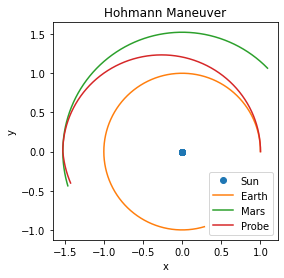

In [312]:
plt.plot(r1_55[:, 0], r1_55[:, 1],"o", label='Sun')
plt.plot(r2_55[:, 0], r2_55[:, 1], label='Earth')
plt.plot(r3_55[:, 0], r3_55[:, 1], label='Mars')
plt.plot(r4_55[:, 0], r4_55[:, 1], label='Probe')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Hohmann Maneuver')
plt.legend(loc="lower right")
plt.axis('scaled')

In [99]:
np.linalg.norm(v3_55[np.argmin(diff[:-1])]-v4_55[np.argmin(diff[:-1])])

0.13126075016829591

In [315]:
np.argmin(diffHM[:-1])

444856

In [269]:
#Setting parameters
#stepsize
dt = 10**(-5)
#number of steps
Nsteps = 1200000
#1st mass
m1_55 = 1
#2nd mass
m2_55 = 3*10**(-6)

m3_55 = 3.227*10**(-7)

rmars=1.52366214
vmars=np.sqrt(rmars*G*m1_51)/rmars
LEorbit=2.39214608*10**(-4)
HMorbit=9.4821*10**(-6)
marsstartH = - vmars/rmars * np.pi*np.sqrt((1+rmars)**3 /(8*G*m1_55))+np.pi
time=np.arange(0,Nsteps*dt,dt)

#storange arrays for positions, velocites, energies and center of mass
r1_55 = np.zeros((Nsteps  ,Ndim  ))
r2_55 = np.zeros((Nsteps  ,Ndim  ))
r3_55 = np.zeros((Nsteps  ,Ndim  ))
v1_55 = np.zeros((Nsteps  ,Ndim  ))
v2_55 = np.zeros((Nsteps  ,Ndim  ))
v3_55 = np.zeros((Nsteps  ,Ndim  ))
r4_55 = np.zeros((Nsteps  ,Ndim  ))
v4_55 = np.zeros((Nsteps  ,Ndim  ))
diff  = np.zeros(Nsteps)

E1_55  = np.zeros((Nsteps))
E2_55  = np.zeros((Nsteps))
EPpot  = np.zeros((Nsteps))


r2_55[0 ,: ] = np.array((1 ,0 ))
v2_55[0 ,: ] = np.array((0 ,1 ))*np.sqrt(G*m1_51)

r3_55[0 ,: ] = np.array((np.cos(0.3697558625469377) ,np.sin(0.3697558625469377)))*rmars
v3_55[0 ,: ] = np.array((-np.sin(0.3697558625469377) ,np.cos(0.3697558625469377)))*vmars

r4_55[0 ,: ] = np.array((np.cos(1.373345569347009) ,np.sin(1.373345569347009)))*LEorbit+np.array((1 ,0 ))
v4_55[0 ,: ] = np.array((np.cos(1.373345569347009) ,np.sin(1.373345569347009)))*v_probe

In [270]:
for p in range(Nsteps-1):
    diff[p]=np.linalg.norm(r4_55[p]-r3_55[p])
                
    f2 = force(r2_55[p],r1_55[p],m2_55,m1_55) + force(r2_55[p],r3_55[p],m2_55,m3_55)
    f3 = force(r3_55[p],r1_55[p],m3_55,m1_55) + force(r3_55[p],r2_55[p],m3_55,m2_55)
    f4 = (force(r4_55[p],r2_55[p],   1,m2_55) + force(r4_55[p],r1_55[p],    1,m1_55) +
          force(r4_55[p],r3_55[p],   1,m3_55))
    
                #define position on the next timestep
    r2_55[p+1] = r2_55[p]+v2_55[p]*dt+f2/(2*m2_55)*dt**2
    r3_55[p+1] = r3_55[p]+v3_55[p]*dt+f3/(2*m3_55)*dt**2
    r4_55[p+1] = r4_55[p]+v4_55[p]*dt+f4/(2)      *dt**2
      
                # define forces on the next timestep
    f2new = force(r2_55[p],r1_55[p],m2_55,m1_55) + force(r2_55[p],r3_55[p],m2_55,m3_55)
    f3new = force(r3_55[p],r1_55[p],m3_55,m1_55) + force(r3_55[p],r2_55[p],m3_55,m2_55)
    f4new = (force(r4_55[p],r2_55[p],   1,m2_55) + force(r4_55[p],r1_55[p],    1,m1_55) +
                         force(r4_55[p],r3_55[p],   1,m3_55))
    
                #define vepocities on the next timestep
    v2_55[p+1] = v2_55[p]+dt*(f2+f2new)/(2*m2_55)
    v3_55[p+1] = v3_55[p]+dt*(f3+f3new)/(2*m3_55)
    v4_55[p+1] = v4_55[p]+dt*(f4+f4new)/(2)

(-4.74105e-05, 4.74105e-05)

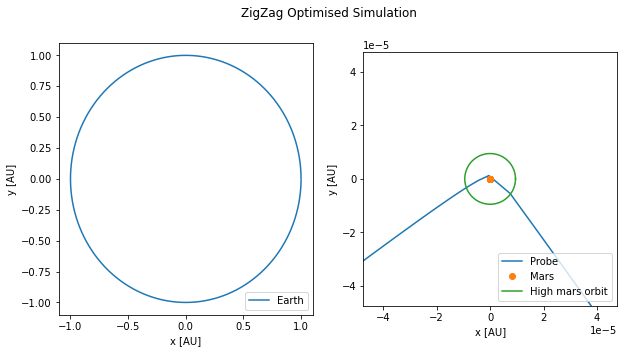

In [309]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('ZigZag Optimised Simulation')

#ax1.plot(r4_55[:np.argmin(diff[:-1]), 0], r4_55[:np.argmin(diff[:-1]), 1], label='Probe')
ax1.plot(r2_55[:627000, 0], r2_55[:627000, 1], label='Earth')
#ax1.plot(r3_55[:, 0], r3_55[:, 1], label='Mars')
#ax1.plot(r1_55[:, 0], r1_55[:, 1],"o", label='Sun')

ax1.set_xlabel('x [AU]')
ax1.set_ylabel('y [AU]')
ax1.legend(loc="lower right")
#ax1.axis('scaled')


ax2.plot((r4_55-r3_55)[:, 0], (r4_55-r3_55)[:, 1], label='Probe')
ax2.plot(r1_55[:, 0], r1_55[:, 1],"o", label='Mars')
ax2.plot(HMorbit*np.cos(np.linspace(0,2*np.pi,1000)), HMorbit*np.sin(np.linspace(0,2*np.pi,1000)), label='High mars orbit')


ax2.set_xlabel('x [AU]')
ax2.set_ylabel('y [AU]')
ax2.legend(loc="lower right")
ax2.axis('scaled')
ax2.set_xlim((-5*HMorbit,5*HMorbit))
ax2.set_ylim((-5*HMorbit,5*HMorbit))

In [131]:
r1_55

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [276]:
np.linalg.norm((v4_55-v3_55)[np.argmin(diff[:-1])])

0.5090160382474391

In [277]:
np.argmin(diff[:-1])

345695

In [275]:
np.min(diff[:-1])

1.327221771882643e-06

In [150]:
abs(mstart_array[4]-theta_array[3])

1.0035897068000714

In [151]:
j

16

In [155]:
mstart_array[4]

0.3697558625469377

In [154]:
theta_array[2]

1.373345569347009

In [171]:
np.linalg.norm((v4_55-v3_55)[np.argmin(diff[:-1])-40])

0.14229567384870886

In [170]:
diff[np.argmin(diff[:-1])-40]

7.257407635227571e-05

(-4.74105e-05, 4.74105e-05)

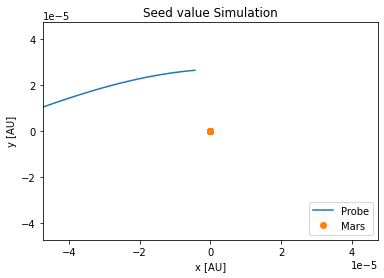

In [229]:
plt.plot((r4_55-r3_55)[:np.argmin(diff[:-1]), 0], (r4_55-r3_55)[:np.argmin(diff[:-1]), 1], label='Probe')
plt.plot(r1_55[:, 0], r1_55[:, 1],"o", label='Mars')

plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Seed value Simulation')
plt.legend(loc="lower right")
plt.xlim((-5*HMorbit,5*HMorbit))
plt.ylim((-5*HMorbit,5*HMorbit))

In [279]:
marsstart

0.36925102715824476

In [280]:
thetatrue

1.3733277589449973

In [284]:
thetatrue-theta_a

1.4980281133336604e-06

In [283]:
thetatrue-theta_b

0.0

In [286]:
(vmars/rmars * dt)/2

2.65850199071612e-06